In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
data.shape

(8425, 23)

In [4]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [6]:
data = data.dropna(subset=['Evaporation', 'Sunshine', 'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm'])

In [7]:
data.shape

(3988, 23)

In [8]:
data.isnull().sum()

Date              0
Location          0
MinTemp           2
MaxTemp           2
Rainfall          9
Evaporation       0
Sunshine          0
WindGustDir      60
WindGustSpeed    60
WindDir9am       65
WindDir3pm       15
WindSpeed9am      1
WindSpeed3pm      1
Humidity9am       3
Humidity3pm       2
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           3
Temp3pm           0
RainToday         9
RainTomorrow     55
dtype: int64

In [10]:
data = data.dropna(subset=['RainToday', 'RainTomorrow'])

In [12]:
data.isnull().sum()

Date              0
Location          0
MinTemp           1
MaxTemp           1
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir      57
WindGustSpeed    57
WindDir9am       64
WindDir3pm       15
WindSpeed9am      1
WindSpeed3pm      1
Humidity9am       2
Humidity3pm       2
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           2
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926 entries, 907 to 8385
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3926 non-null   object 
 1   Location       3926 non-null   object 
 2   MinTemp        3925 non-null   float64
 3   MaxTemp        3925 non-null   float64
 4   Rainfall       3926 non-null   float64
 5   Evaporation    3926 non-null   float64
 6   Sunshine       3926 non-null   float64
 7   WindGustDir    3869 non-null   object 
 8   WindGustSpeed  3869 non-null   float64
 9   WindDir9am     3862 non-null   object 
 10  WindDir3pm     3911 non-null   object 
 11  WindSpeed9am   3925 non-null   float64
 12  WindSpeed3pm   3925 non-null   float64
 13  Humidity9am    3924 non-null   float64
 14  Humidity3pm    3924 non-null   float64
 15  Pressure9am    3926 non-null   float64
 16  Pressure3pm    3926 non-null   float64
 17  Cloud9am       3926 non-null   float64
 18  Cloud3

<strong>Problem Statement  -:  We need to predict RainTomorrow(Boolean) and RainFall(Continuos)</strong>

In [15]:
num_cols = [col for col in data.columns if data[col].dtype!='object']

In [16]:
cat_cols = [col for col in data.columns if col not in num_cols]

<h2>Exploratory Data Analysis</h2>

<h3>ScatterPlots</h3>

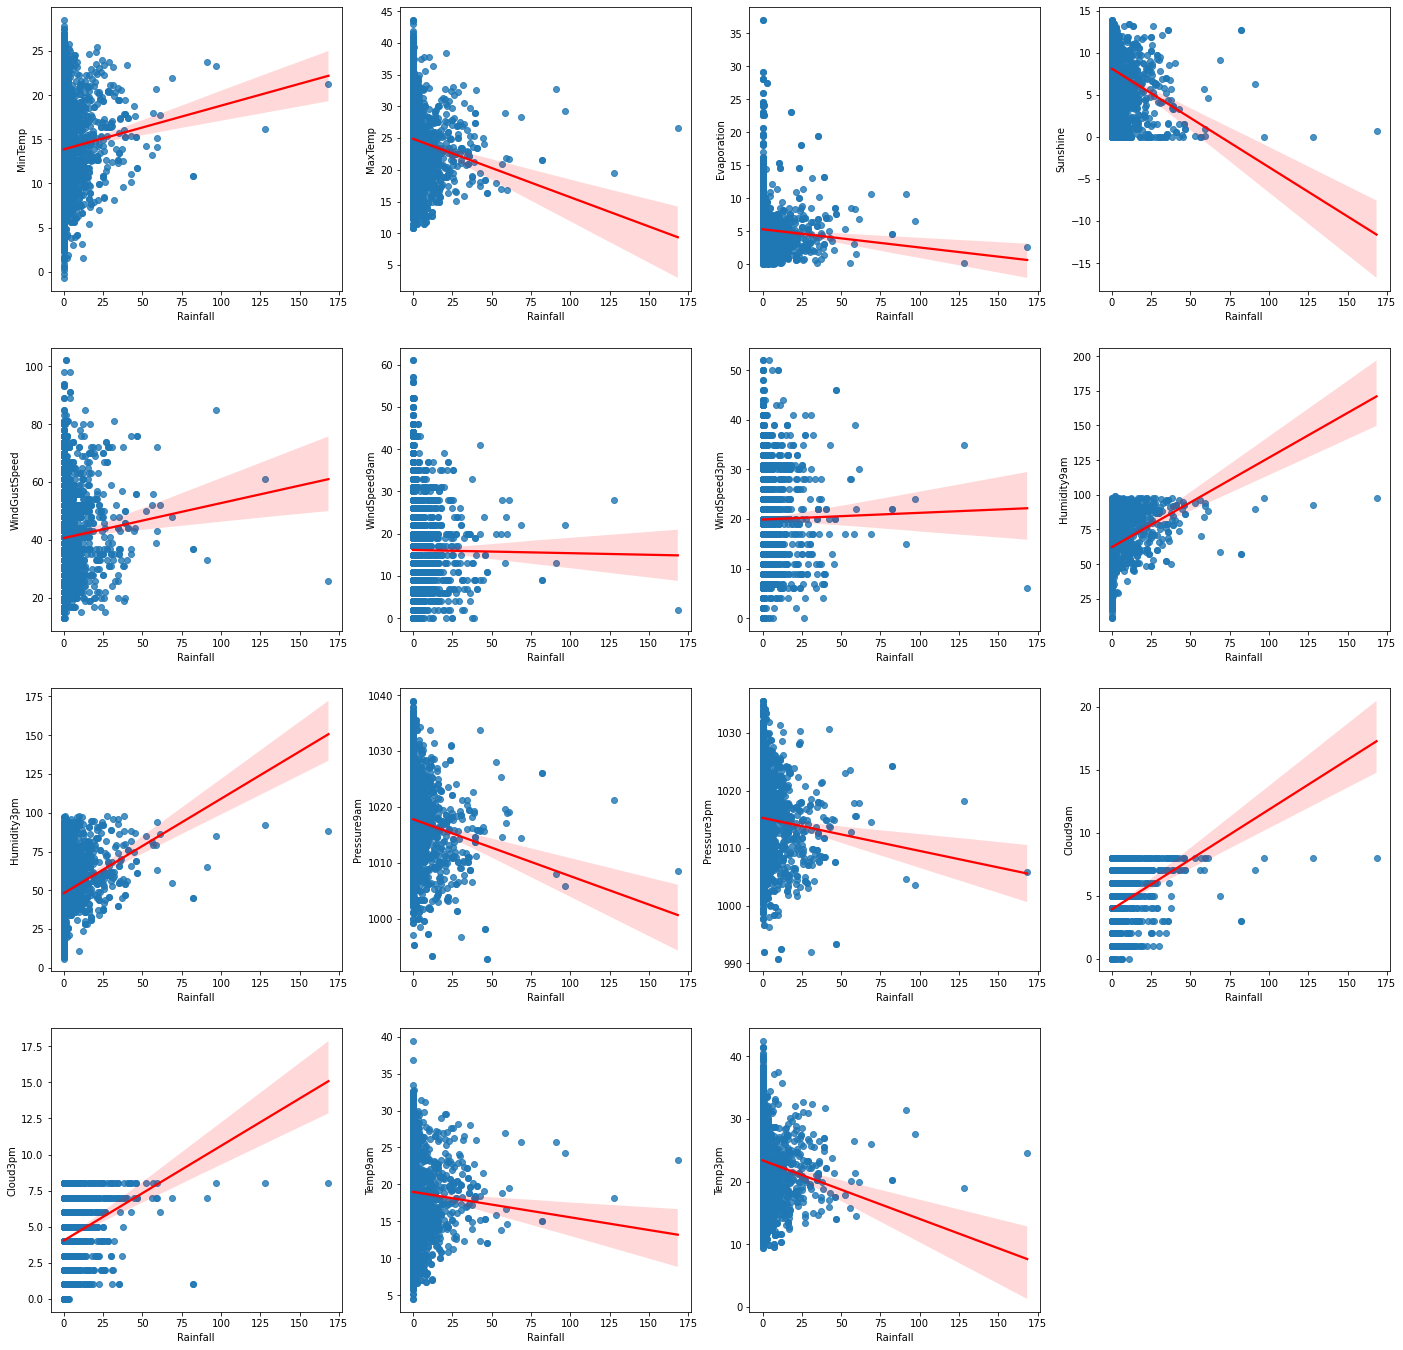

In [20]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    if col=='Rainfall':
        continue
    plt.subplot(4,4, plotnumber)
    sns.regplot('Rainfall', col, data=data, line_kws={'color':'red'})
    plotnumber+=1

<strong>
    <ul>
        <li>MinTemp has upwards trend with RainFall</li>
        <li>MaxTemp has downwards trend with RainFall</li>
        <li>Sunshine has downwards trend with RainFall</li>
        <li>Humidity9am has upwards trend with RainFall</li>
        <li>Humidity3pm has upwards trend with RainFall</li>
        <li>Clouds9am has upwards trend with RainFall</li>
        <li>Cloud3pm has upwards trend with RainFall</li>
        <li>Temp3pm has downwards trend with RainFall</li>
    </ul>
</strong>

<h3>Stripplots</h3>

In [23]:
data = data.drop(columns='Date')
cat_cols.remove('Date')

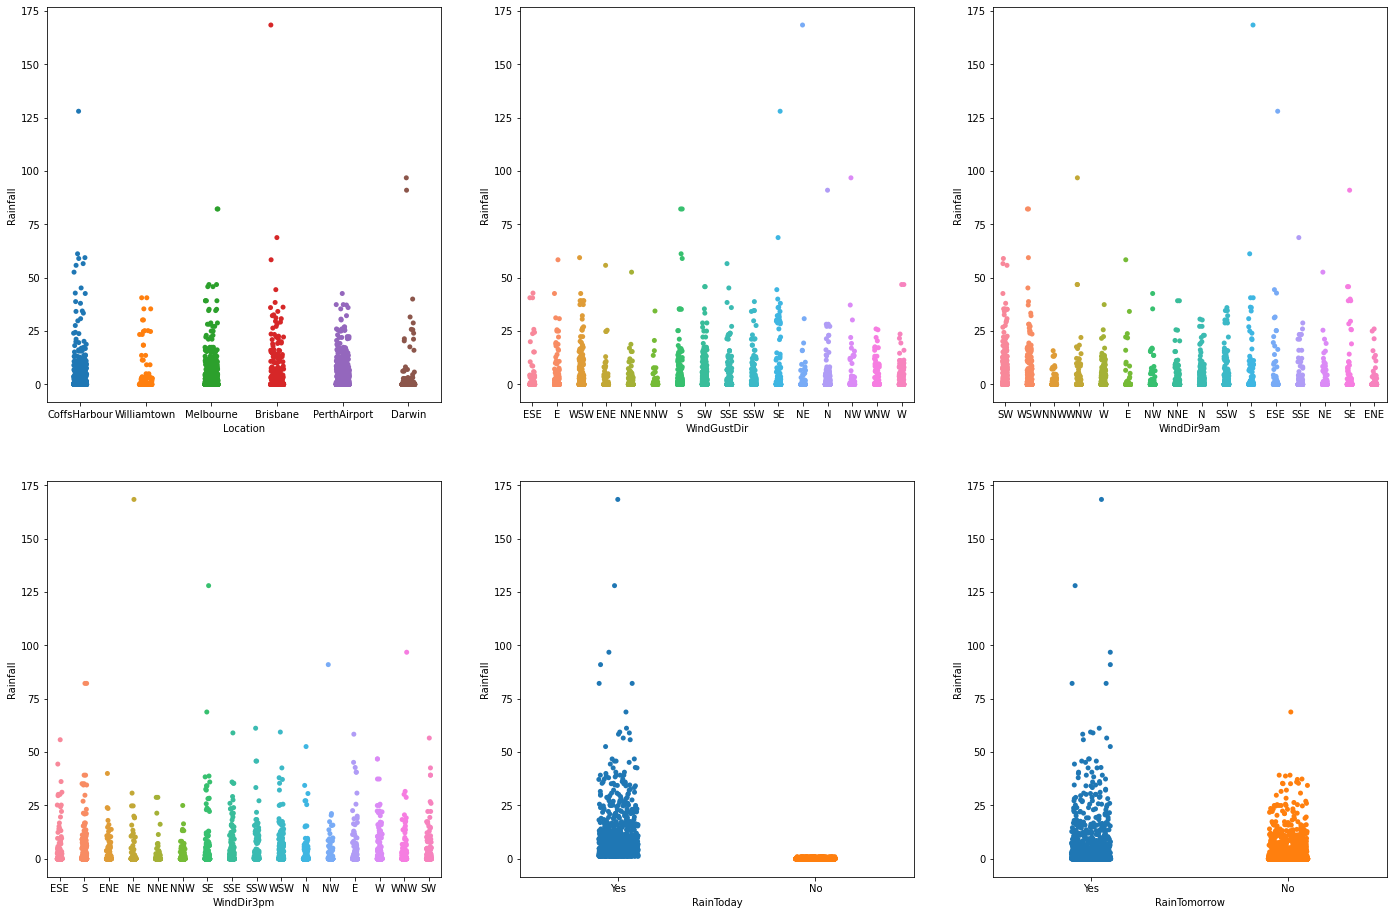

In [25]:
plt.figure(figsize=(24,16))
plotnumber=1
for col in cat_cols:
    
    plt.subplot(2,3,plotnumber)
    sns.stripplot(col, 'Rainfall', data=data)
    plotnumber+=1

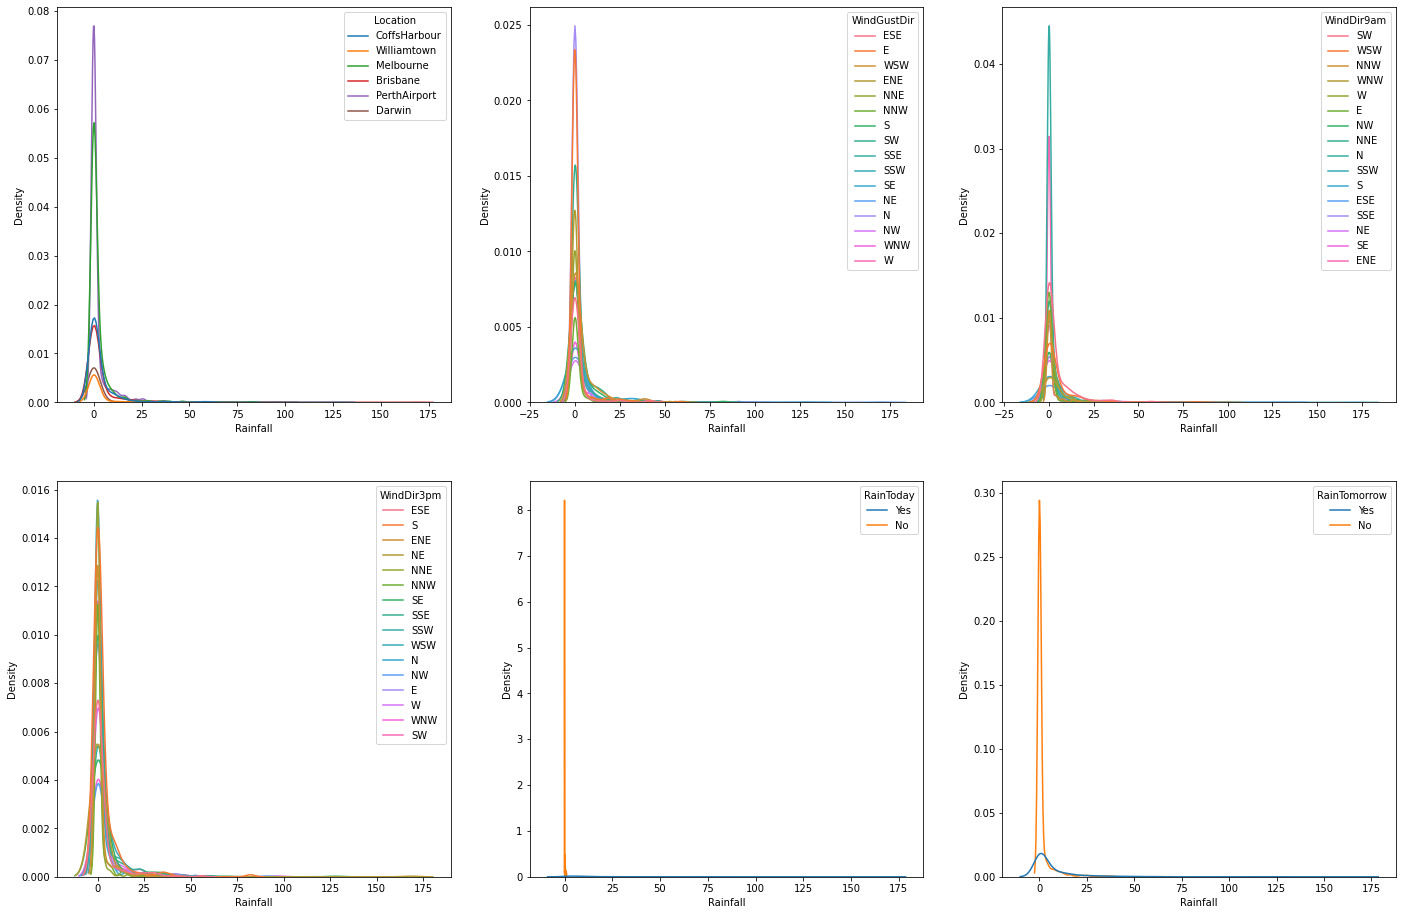

In [26]:
plt.figure(figsize=(24,16))
plotnumber=1
for col in cat_cols:
    
    plt.subplot(2,3,plotnumber)
    sns.kdeplot('Rainfall',data=data, hue=col)
    plotnumber+=1

<strong>All peaks are almost at the same places</strong>

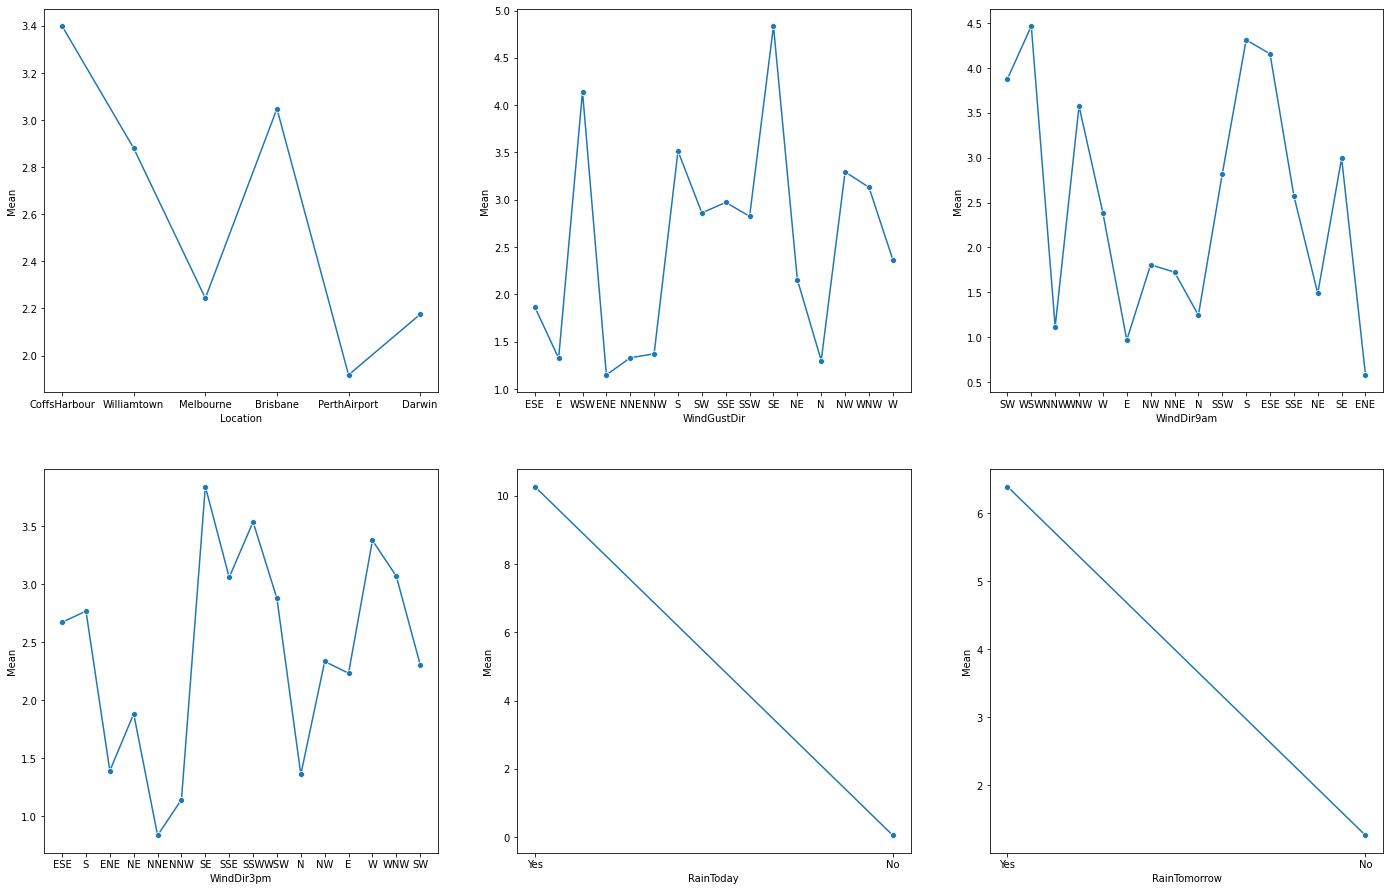

In [28]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in cat_cols:
    mean_vals = pd.DataFrame()
    unique_val = data[col].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data[col] == val]
        mean_val = mean_val['Rainfall'].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(3,3, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plotnumber+=1

<strong>If region is coffsHarbor, williamtown or brisbane then rainfall is high<br> If wind direction is WSW or SE , rainfall is high</strong>

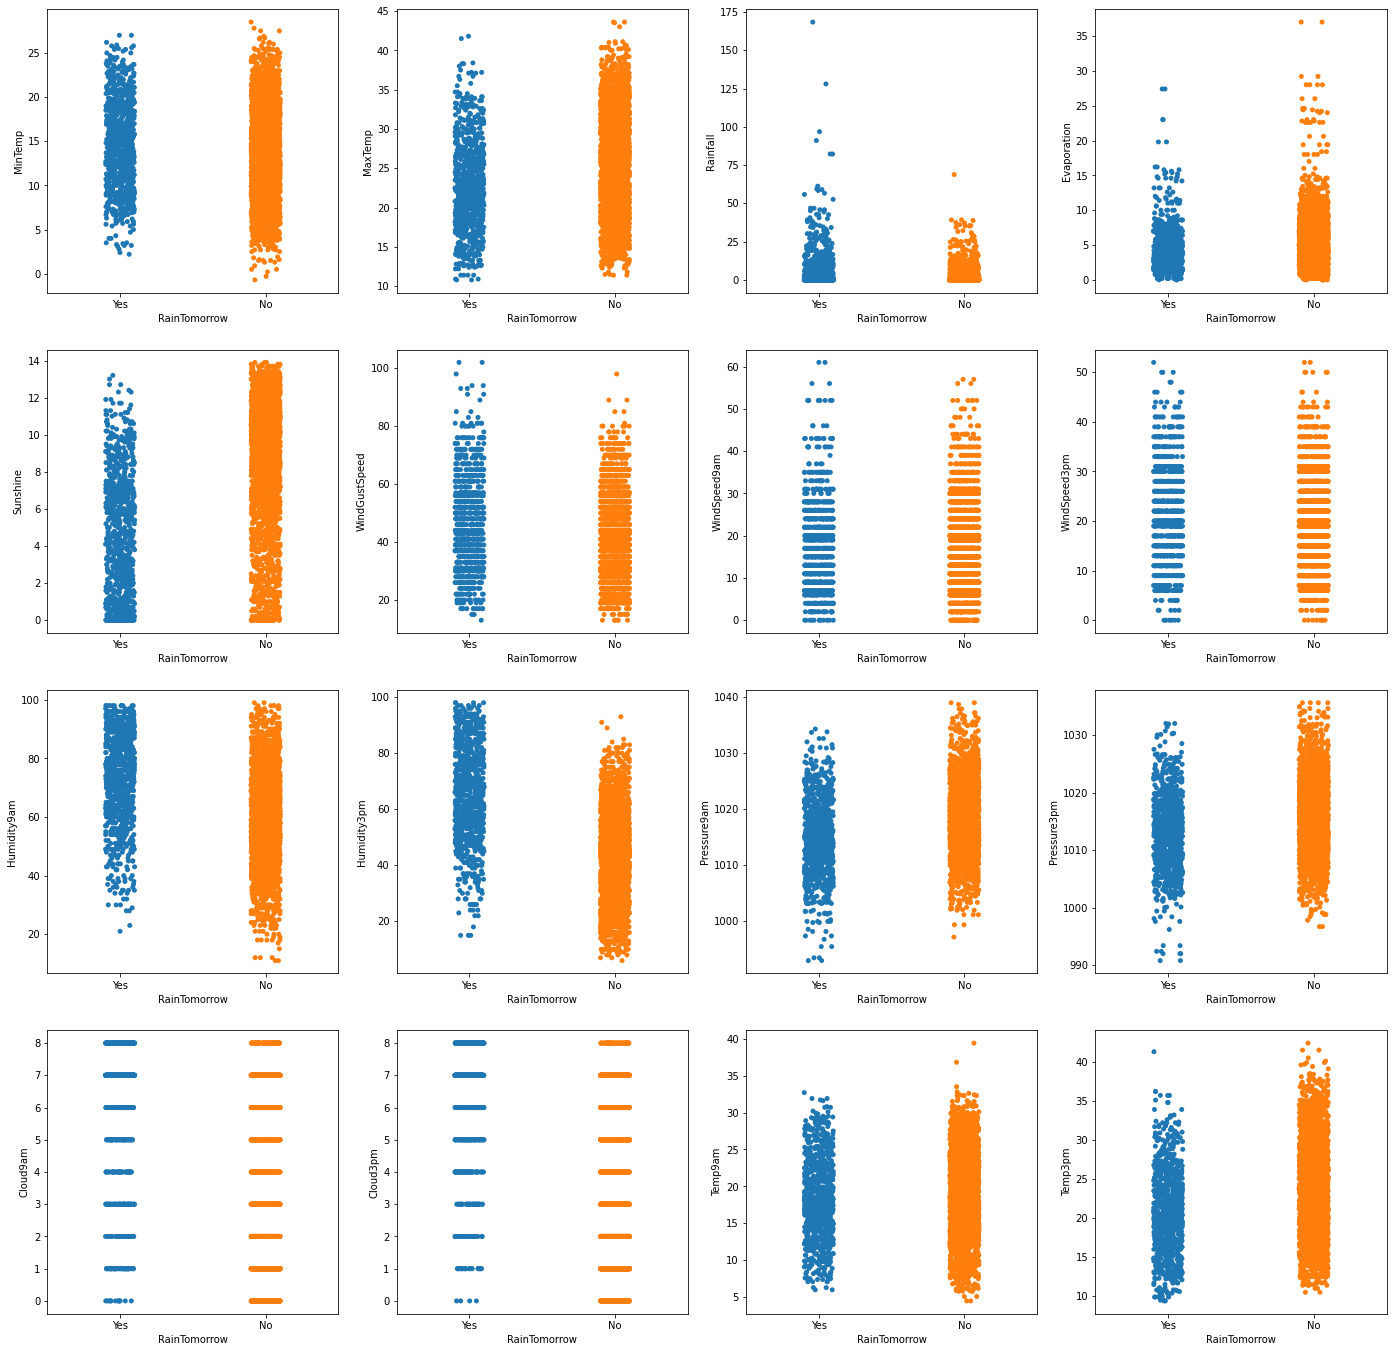

In [30]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    plt.subplot(4,4,plotnumber)
    sns.stripplot('RainTomorrow', col, data=data)
    plotnumber+=1

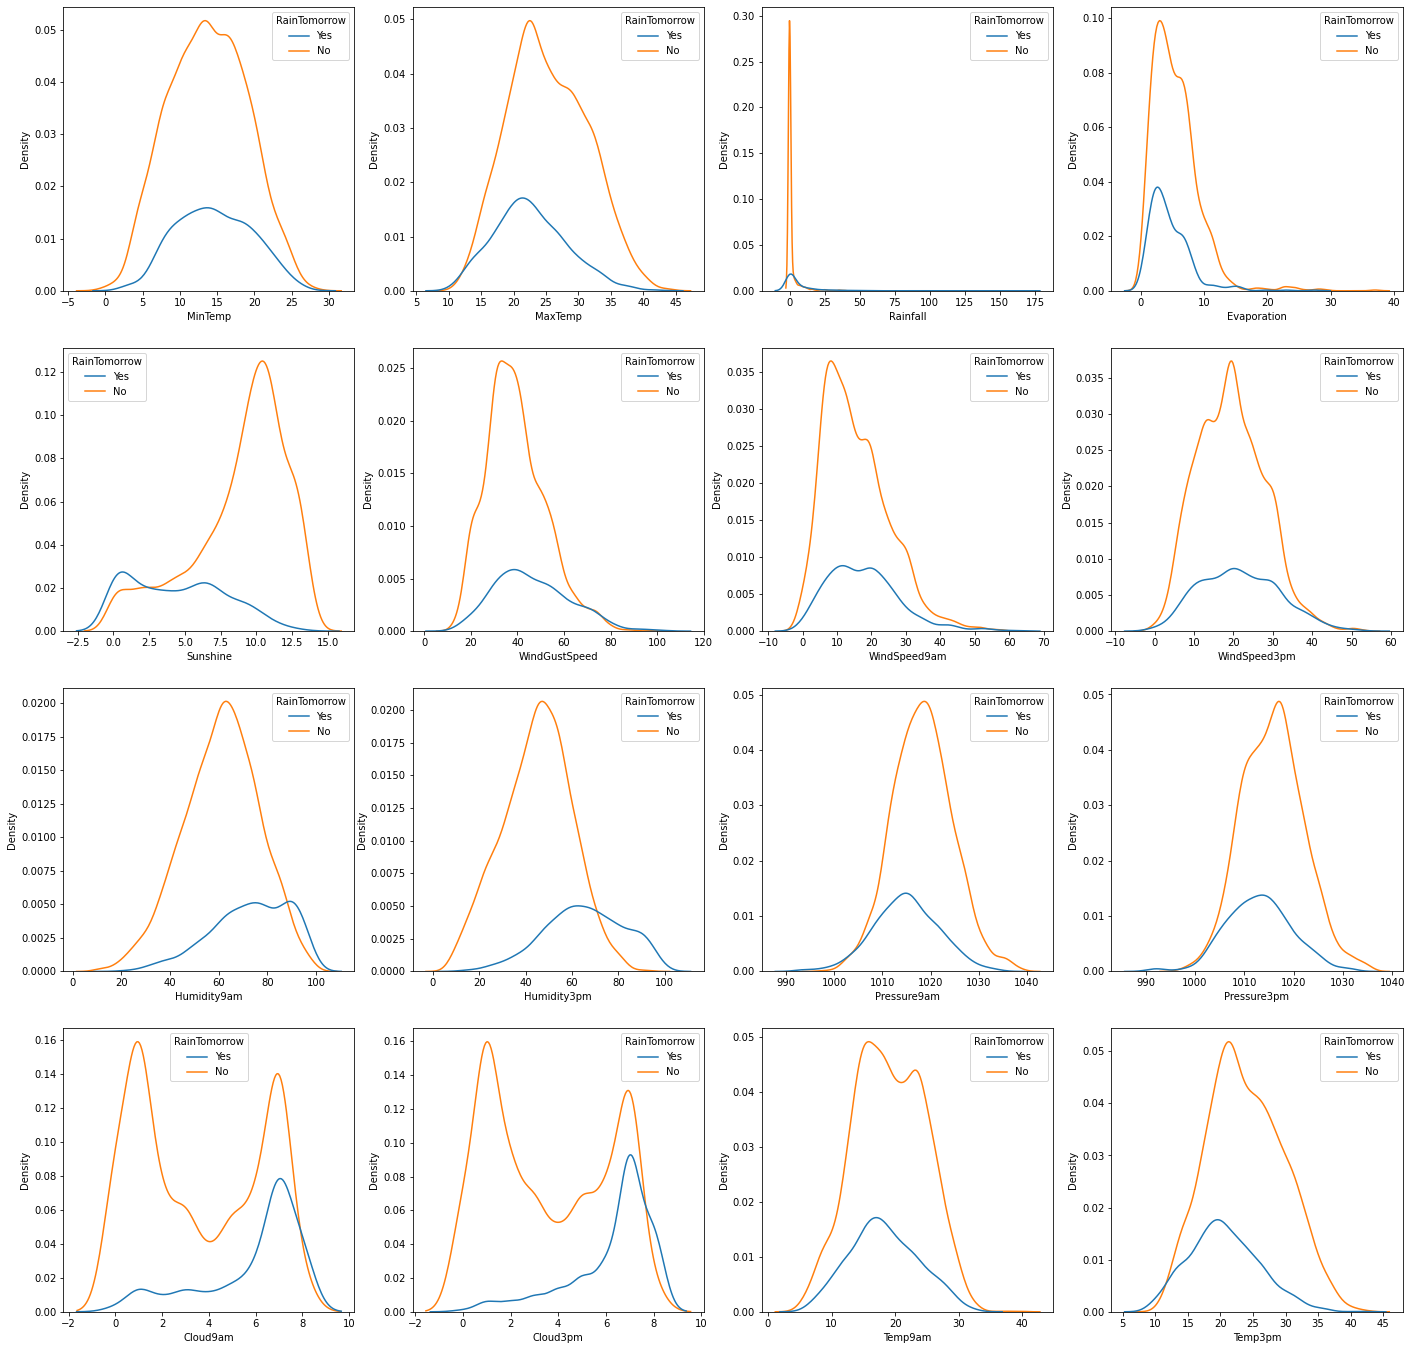

In [31]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    plt.subplot(4,4,plotnumber)
    sns.kdeplot(col,hue='RainTomorrow', data=data)
    plotnumber+=1

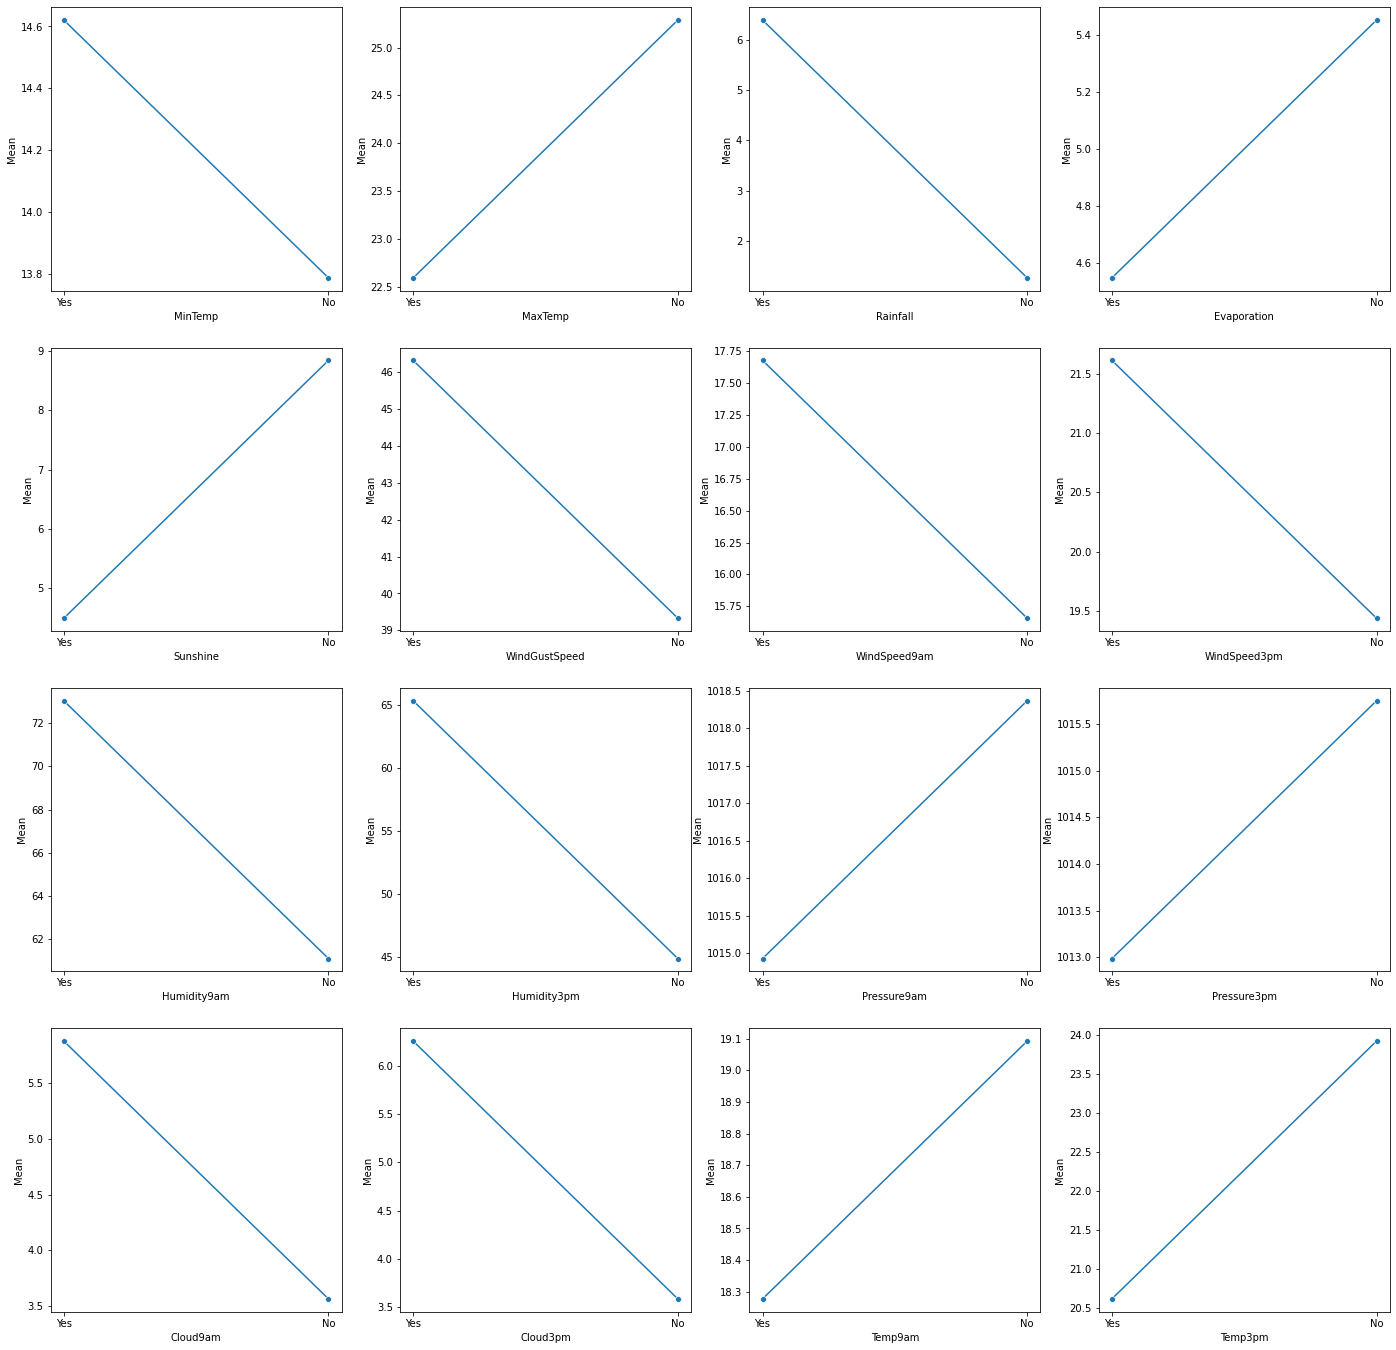

In [35]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    mean_vals = pd.DataFrame()
    unique_val = data['RainTomorrow'].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data['RainTomorrow'] == val]
        mean_val = mean_val[col].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(4,4, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plotnumber+=1

<h2>Corrleation Matrix</h2>

In [36]:
data.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.738282  0.073706     0.498011  0.074616   
MaxTemp        0.738282  1.000000 -0.117776     0.597886  0.516821   
Rainfall       0.073706 -0.117776  1.000000    -0.058829 -0.236726   
Evaporation    0.498011  0.597886 -0.058829     1.000000  0.348371   
Sunshine       0.074616  0.516821 -0.236726     0.348371  1.000000   
WindGustSpeed  0.140786  0.131287  0.067520     0.265876  0.000727   
WindSpeed9am   0.086459  0.076594 -0.006012     0.225665 -0.006807   
WindSpeed3pm   0.100455  0.066379  0.011790     0.191022  0.059761   
Humidity9am   -0.081734 -0.420321  0.304653    -0.403980 -0.514416   
Humidity3pm    0.051717 -0.421293  0.265709    -0.314897 -0.626503   
Pressure9am   -0.475059 -0.354697 -0.120011    -0.277175  0.020890   
Pressure3pm   -0.482889 -0.450052 -0.068477    -0.296547 -0.053558   
Cloud9am       0.135546 -0.305388  0.220813    -0.136524 -0.702359   
Cloud3pm       0.050217 -0.303528  0.191164    -0.186556 -0.723012   
Temp9am        0.859672  0.890086 -0.048227     0.569097  0.346444   
Temp3pm        0.709991  0.976613 -0.122564     0.582858  0.541402   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.140786      0.086459      0.100455    -0.081734   
MaxTemp             0.131287      0.076594      0.066379    -0.420321   
Rainfall            0.067520     -0.006012      0.011790     0.304653   
Evaporation         0.265876      0.225665      0.191022    -0.403980   
Sunshine            0.000727     -0.006807      0.059761    -0.514416   
WindGustSpeed       1.000000      0.699303      0.707973    -0.261243   
WindSpeed9am        0.699303      1.000000      0.524750    -0.359683   
WindSpeed3pm        0.707973      0.524750      1.000000    -0.169203   
Humidity9am        -0.261243     -0.359683     -0.169203     1.000000   
Humidity3pm        -0.155743     -0.215940     -0.072527     0.657109   
Pressure9am        -0.359563     -0.169032     -0.271778     0.125151   
Pressure3pm        -0.327598     -0.150562     -0.227755     0.175474   
Cloud9am            0.046832      0.014137      0.041515     0.442083   
Cloud3pm            0.118059      0.072297      0.052785     0.350912   
Temp9am             0.103751      0.046867      0.097059    -0.364172   
Temp3pm             0.094250      0.068236      0.037206    -0.411066   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.051717    -0.475059    -0.482889  0.135546  0.050217   
MaxTemp          -0.421293    -0.354697    -0.450052 -0.305388 -0.303528   
Rainfall          0.265709    -0.120011    -0.068477  0.220813  0.191164   
Evaporation      -0.314897    -0.277175    -0.296547 -0.136524 -0.186556   
Sunshine         -0.626503     0.020890    -0.053558 -0.702359 -0.723012   
WindGustSpeed    -0.155743    -0.359563    -0.327598  0.046832  0.118059   
WindSpeed9am     -0.215940    -0.169032    -0.150562  0.014137  0.072297   
WindSpeed3pm     -0.072527    -0.271778    -0.227755  0.041515  0.052785   
Humidity9am       0.657109     0.125151     0.175474  0.442083  0.350912   
Humidity3pm       1.000000    -0.048722     0.037174  0.490152  0.505821   
Pressure9am      -0.048722     1.000000     0.960284 -0.124535 -0.127993   
Pressure3pm       0.037174     0.960284     1.000000 -0.040299 -0.054173   
Cloud9am          0.490152    -0.124535    -0.040299  1.000000  0.645868   
Cloud3pm          0.505821    -0.127993    -0.054173  0.645868  1.000000   
Temp9am          -0.148802    -0.461337    -0.506845 -0.158941 -0.163052   
Temp3pm          -0.497691    -0.307611    -0.413894 -0.327267 -0.353745   

                Temp9am   Temp3pm  
MinTemp        0.859672  0.709991  
MaxTemp        0.890086  0.976613  
Rainfall      -0.048227 -0.122564  
Evaporation    0.569097  0.582858  
Sunshine       0.346444  0.541402  
WindGustSpeed  0.103751  0.094250  
WindSpeed9am   0.046867  0.068236  
Wi

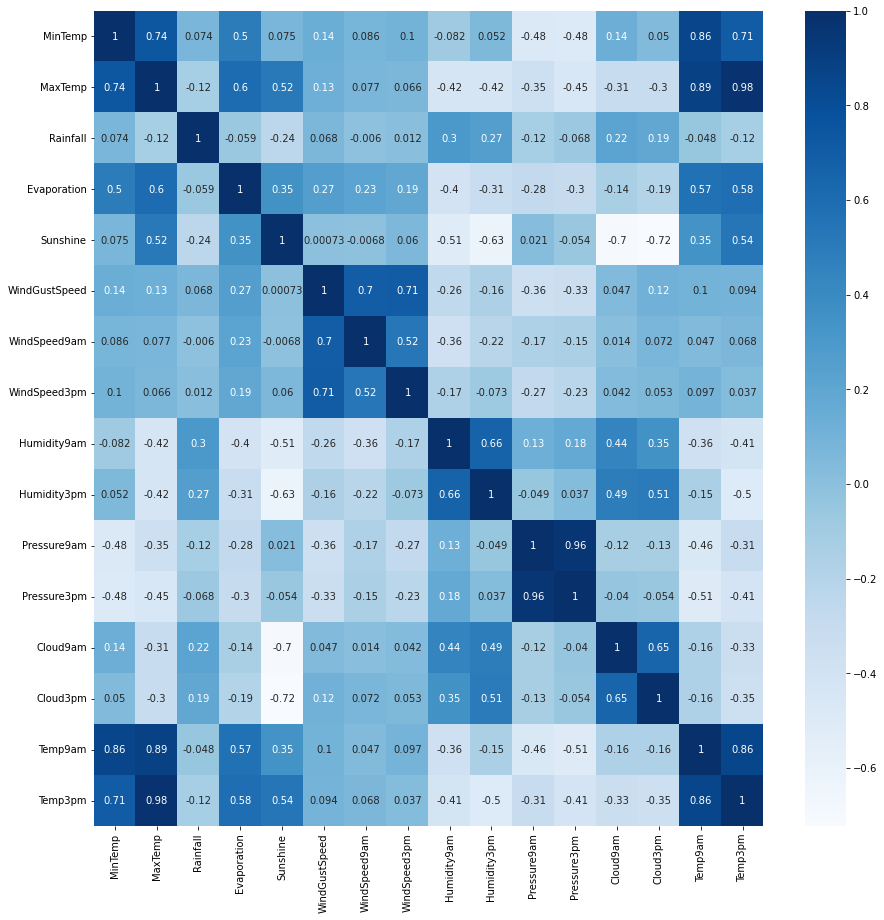

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

<strong>
    <ul>
        <li>MinTemp has 74% correlation with Maxtemp</li>
        <li>Temp9am has 86% correlation  with MinTemp</li>
        <li>Temp9am has 89% correlation  with MaxTemp</li>
        <li>Temp3pm has 71% correlation  with MinTemp</li>
        <li>Temp3pm has 98% correlation  with MaxTempTemp</li>
        <li>WindSpeed9am has 70% correlation with WindGustSpeed</li>
        <li>WindSpeed3pm has 71% correlation with WindGustSpeed</li>
        <li>Temp9am has 86% correlation with Temp3pm</li>
    </ul>
</strong>

<h3>Descriptive Statistics</h3>

In [38]:
data.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3925.000000  3925.000000  3926.000000  3926.000000  3926.000000   
mean     13.980306    24.660994     2.455476     5.242511     7.827764   
std       5.192068     6.048039     7.734731     3.635152     3.826923   
min      -0.700000    10.800000     0.000000     0.000000     0.000000   
25%      10.100000    20.200000     0.000000     2.600000     5.200000   
50%      13.900000    24.000000     0.000000     4.600000     8.900000   
75%      17.900000    29.000000     0.800000     7.000000    10.800000   
max      28.500000    43.600000   168.400000    37.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    3869.000000   3925.000000   3925.000000  3924.000000  3924.000000   
mean       40.965883     16.126879     19.943694    63.868502    49.629969   
std        13.912802      9.712519      8.840911    16.390516    17.731066   
min        13.000000      0.000000      0.000000    11.000000     6.000000   
25%        31.000000      9.000000     13.000000    53.000000    38.000000   
50%        39.000000     15.000000     20.000000    64.000000    49.000000   
75%        50.000000     22.000000     26.000000    75.000000    61.000000   
max       102.000000     61.000000     52.000000    99.000000    98.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  3926.000000  3926.000000  3926.000000  3926.000000  3924.000000   
mean   1017.566786  1015.105094     4.102904     4.205553    18.902880   
std       6.557720     6.484006     2.777362     2.651432     5.521997   
min     992.900000   990.800000     0.000000     0.000000     4.500000   
25%    1013.200000  1010.500000     1.000000     1.000000    14.900000   
50%    1017.500000  1015.100000     5.000000     5.000000    18.600000   
75%    1021.800000  1019.400000     7.000000     7.000000    23.200000   
max    1039.000000  1035.600000     8.000000     8.000000    39.400000   

           Temp3pm  
count  3926.000000  
mean     23.148064  
std       5.900722  
min       9.400000  
25%      19.000000  
50%      22.600000  
75%      27.300000  
max      42.400000

<h3>Pairplots</h3>

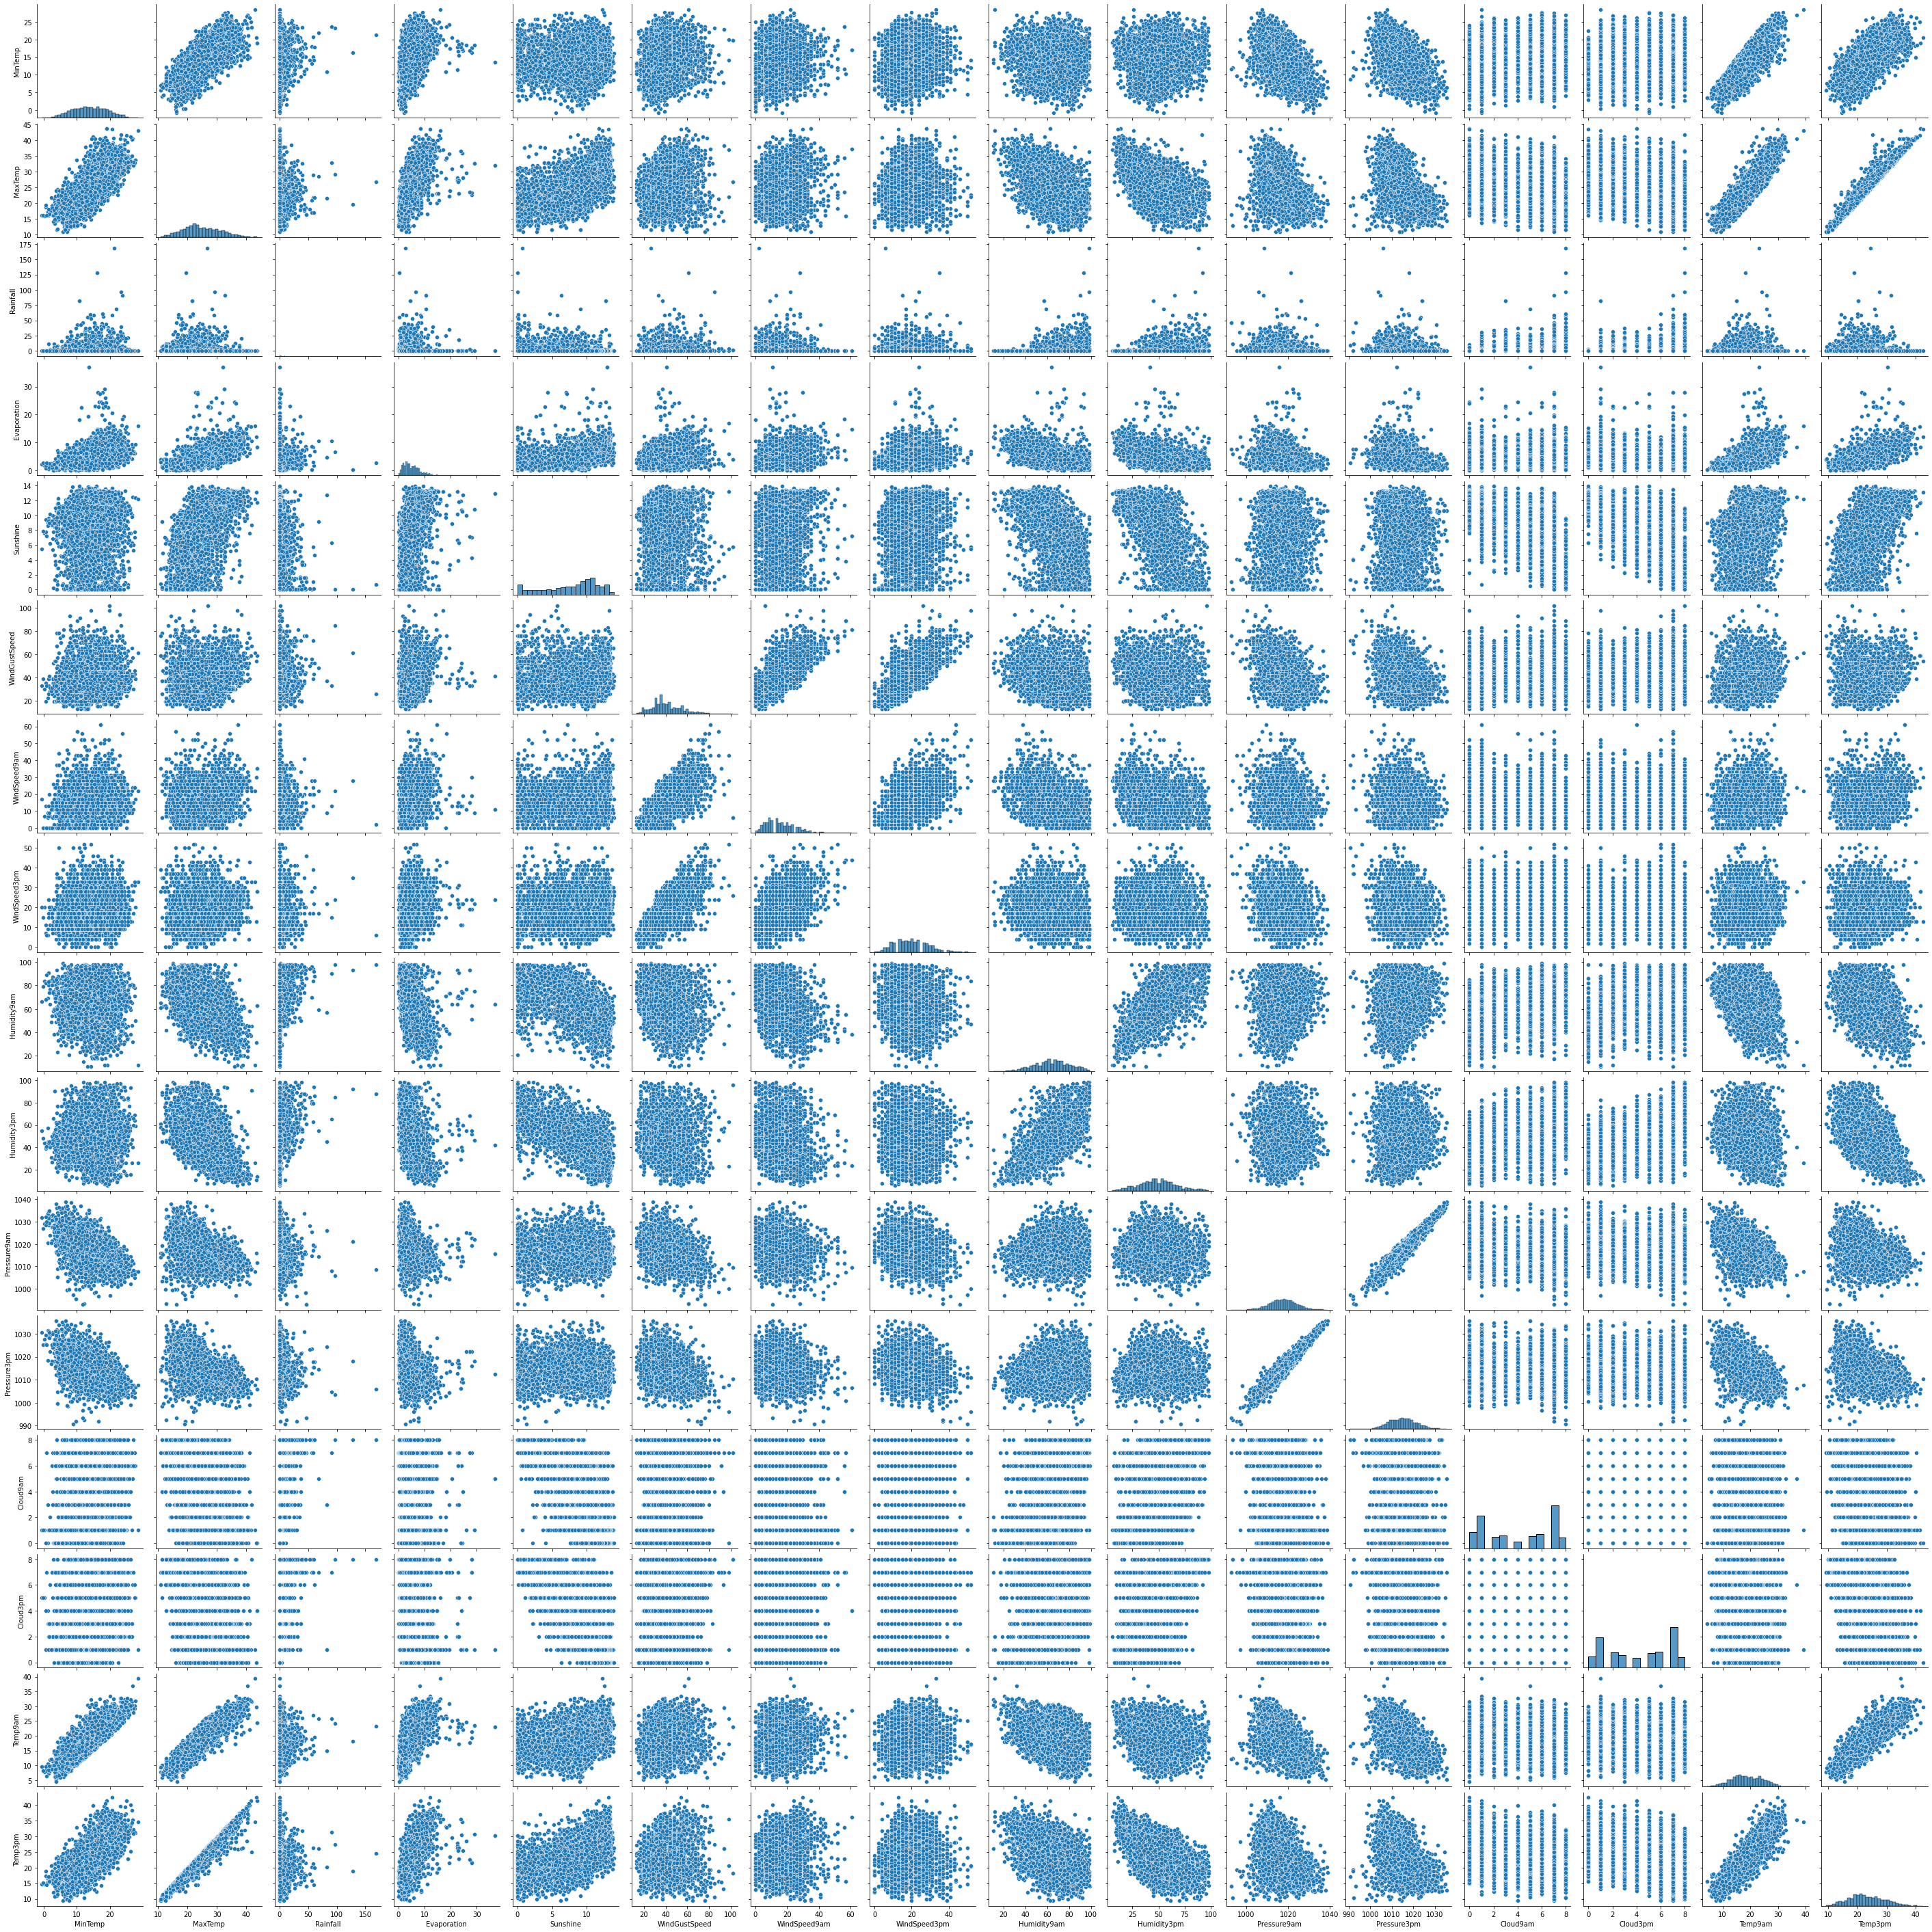

In [39]:
sns.pairplot(data)

<h2>Imputing Missing Values</h2>

In [40]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

In [41]:
it_imp = IterativeImputer()
it_img = pd.DataFrame(it_imp.fit_transform(data[['MinTemp', 
                                                 'MaxTemp',
                                                 'Rainfall',
                                                 'Evaporation',
                                                 'Sunshine',
                                                 'WindGustSpeed',
                                                 'WindSpeed9am',
                                                 'WindSpeed3pm',
                                                 'Humidity9am',
                                                 'Humidity3pm',
                                                 'Pressure9am',
                                                 'Pressure3pm',
                                                 'Cloud9am',
                                                 'Cloud3pm',
                                                 'Temp9am',
                                                 'Temp3pm']]), columns=['MinTemp', 'MaxTemp','Rainfall', 'Evaporation' ,'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm'])

In [42]:
num_cols = ['MinTemp', 'MaxTemp','Rainfall', 'Evaporation' ,'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm' ]

In [43]:
it_img

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        19.8     27.1      24.4          8.6       9.0           35.0   
1        18.7     25.6       6.8          3.8       3.4           33.0   
2        16.5     25.5      16.8          2.8       6.1           19.0   
3        18.5     26.9       0.0          3.2      11.0           30.0   
4        18.2     28.2       0.0          6.8       9.0           50.0   
...       ...      ...       ...          ...       ...            ...   
3921     25.2     34.5       3.0          4.0       9.2           39.0   
3922     26.2     33.3       0.0          6.0       5.9           54.0   
3923     24.9     32.8      20.4          6.2       8.7           37.0   
3924     25.5     33.1       0.0          4.8       7.1           37.0   
3925     24.9     34.3       0.0          5.6       8.6           39.0   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             17.0          22.0         83.0         60.0       1018.9   
1             17.0          13.0         85.0         90.0       1020.7   
2              6.0           9.0         84.0         65.0       1021.5   
3              7.0          20.0         68.0         60.0       1018.9   
4             13.0          35.0         67.0         68.0       1016.3   
...            ...           ...          ...          ...          ...   
3921          11.0          22.0         66.0         46.0       1011.3   
3922          13.0          13.0         66.0         93.0       1010.4   
3923          13.0          20.0         72.0         55.0       1009.9   
3924          20.0          13.0         62.0         58.0       1011.1   
3925          17.0          22.0         63.0         46.0       1012.1   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0          1017.9       6.0       6.0     22.0     26.0  
1          1020.1       4.0       7.0     21.0     20.9  
2          1020.1       5.0       7.0     21.0     24.5  
3          1016.6       2.0       5.0     23.3     26.4  
4          1012.8       1.0       1.0     24.0     25.9  
...           ...       ...       ...      ...      ...  
3921       1007.9       7.0       7.0     29.6     33.4  
3922       1006.8       4.0       8.0     30.2     25.2  
3923       1006.2       4.0       6.0     29.5     32.0  
3924       1006.9       7.0       7.0     28.6     31.5  
3925       1007.9       7.0       3.0     29.8     33.2  

[3926 rows x 16 columns]

In [45]:
it_img.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [50]:
for col in num_cols:
    data[col] = it_img[col].to_list()

In [51]:
data.isnull().sum()

Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir      57
WindGustSpeed     0
WindDir9am       64
WindDir3pm       15
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

<h2>Handling Outlietrs</h2>

<h3>For Regression Probelm`</h3>

In [52]:
num_cols_reg =['MinTemp', 'MaxTemp', 'Evaporation' ,'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm' ]
X_reg = data[num_cols_reg]

In [53]:
X_reg.isnull().sum()

MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

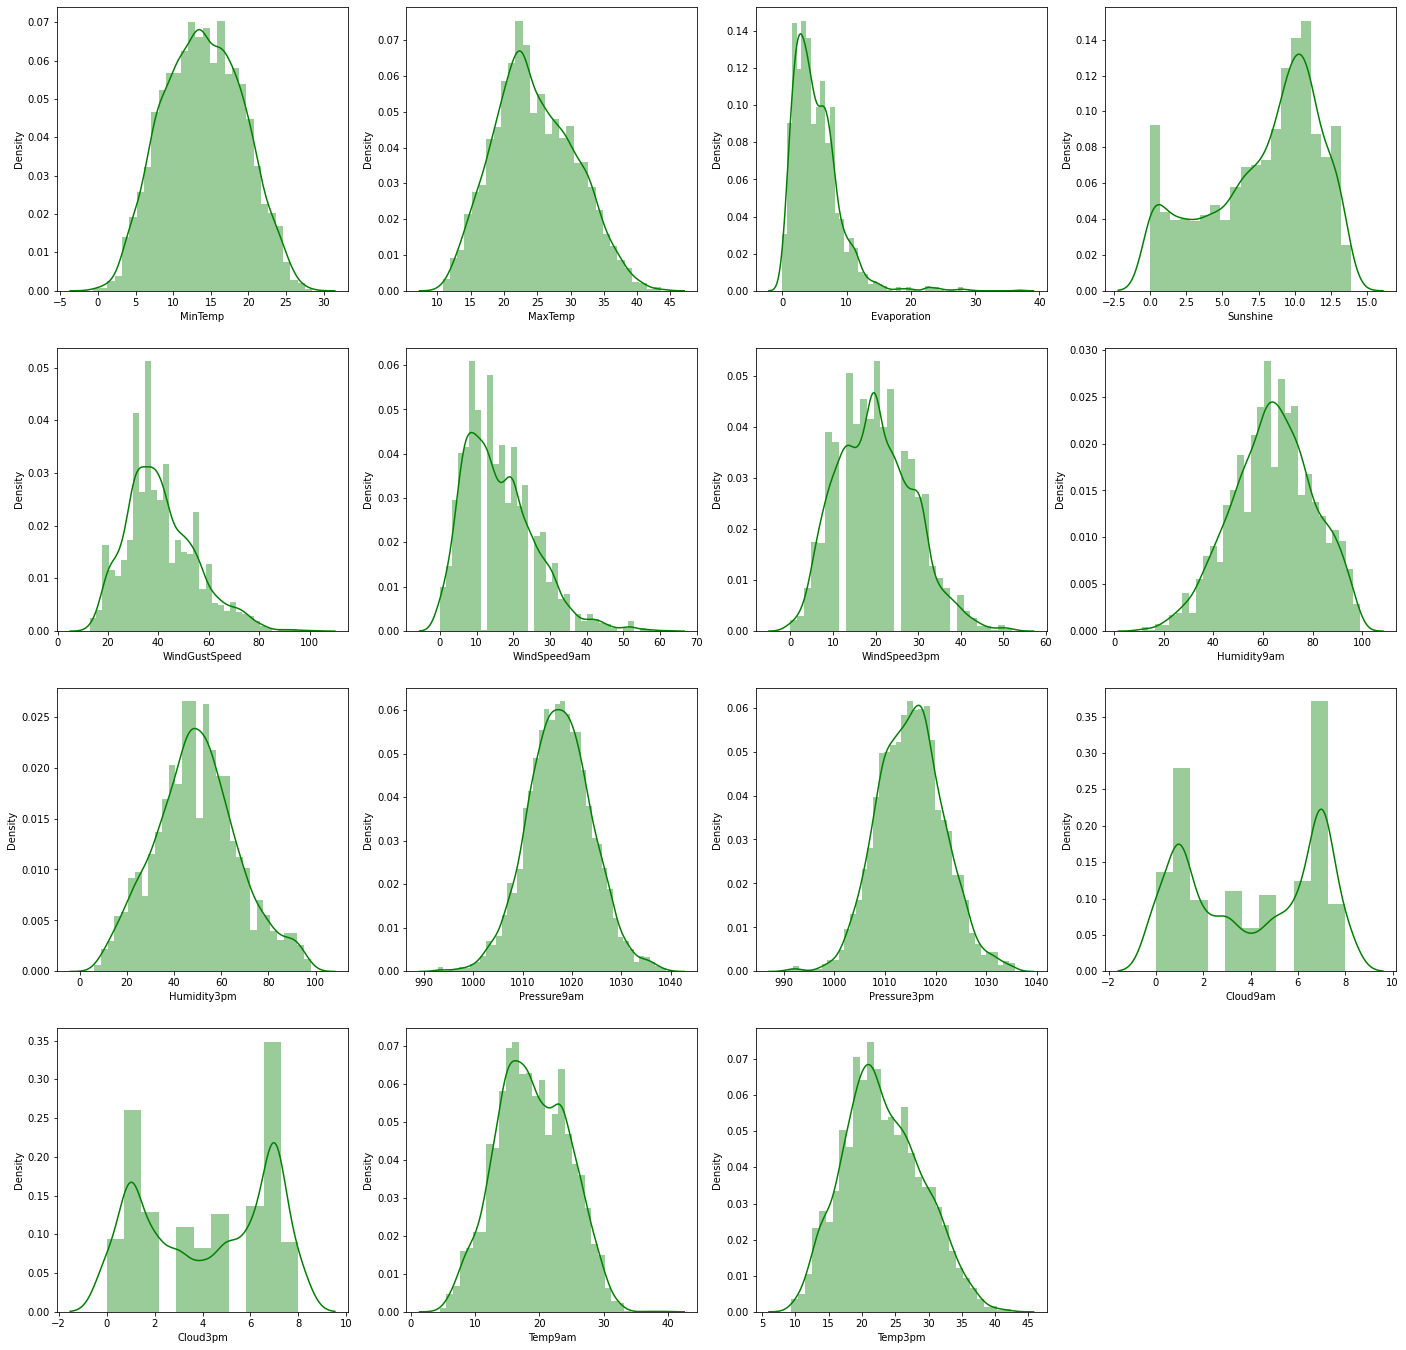

In [55]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in X_reg.columns:
    plt.subplot(4,4,plotnumber)
    sns.distplot(X_reg[col], color='green')
    plotnumber+=1


In [56]:
X_reg.skew()

MinTemp          0.030441
MaxTemp          0.251240
Evaporation      2.103857
Sunshine        -0.590709
WindGustSpeed    0.707037
WindSpeed9am     0.896466
WindSpeed3pm     0.355254
Humidity9am     -0.196192
Humidity3pm      0.186192
Pressure9am      0.014470
Pressure3pm      0.077032
Cloud9am        -0.118018
Cloud3pm        -0.146308
Temp9am          0.040117
Temp3pm          0.252417
dtype: float64

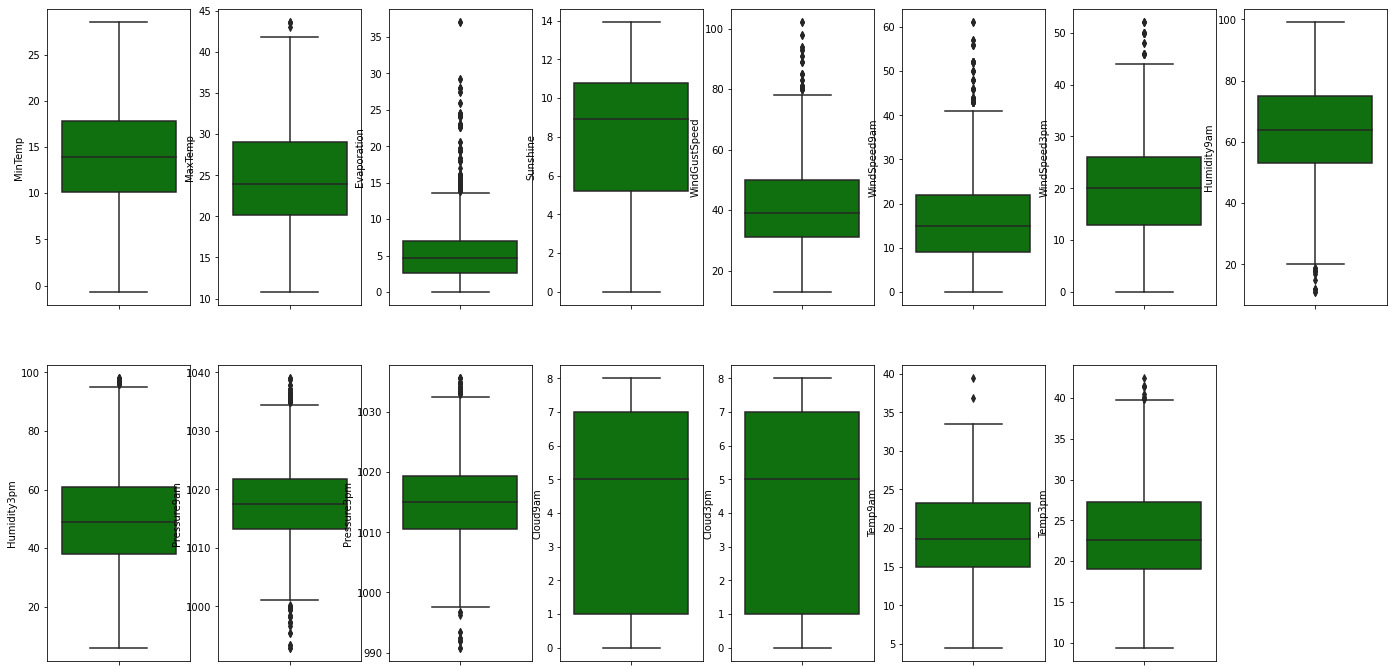

In [58]:
plt.figure(figsize=(24,12))
plotnumber=1
for col in X_reg.columns:
    plt.subplot(2,8,plotnumber)
    sns.boxplot(y=X_reg[col], color='green')
    plotnumber+=1

In [59]:
from scipy.stats import zscore
z = np.abs(zscore(X_reg))

data_reg = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_reg.shape)
print("Total Dropped Rows", data.shape[0] - data_reg.shape[0])

Old Shape (3926, 22)
New Shape (3788, 22)
Total Dropped Rows 138


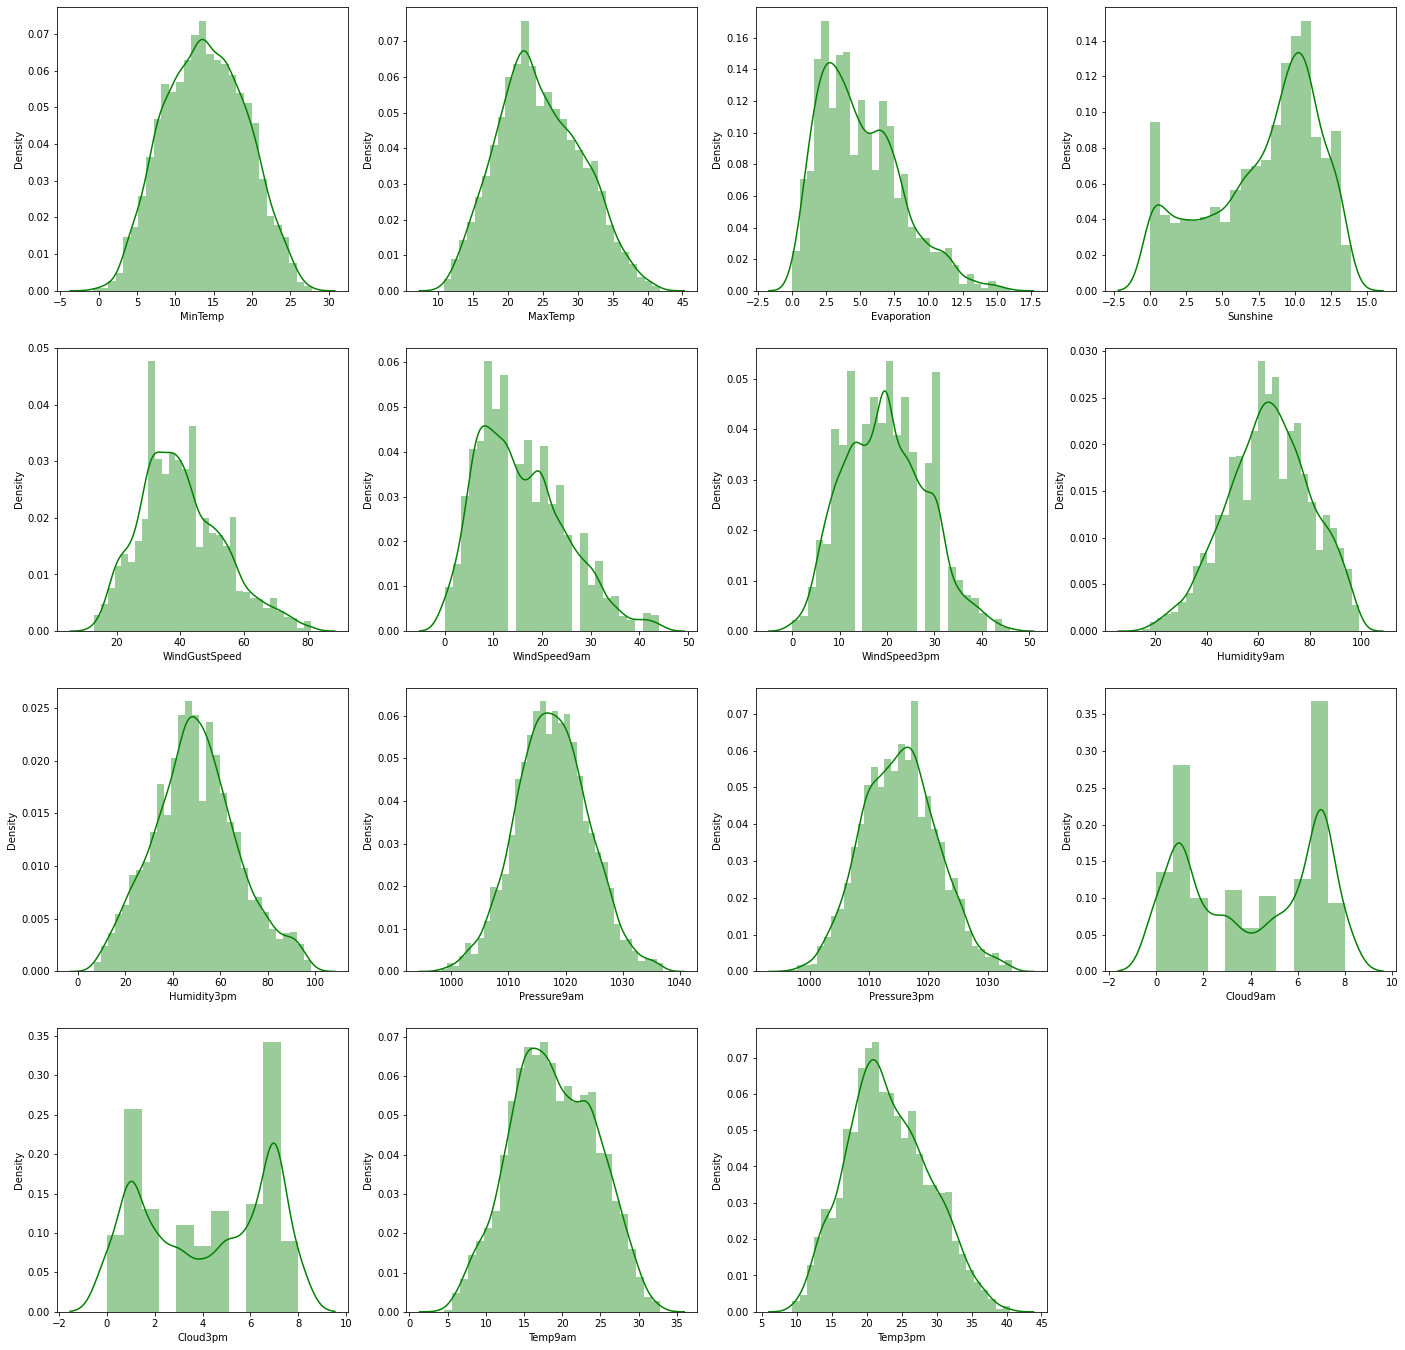

In [62]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in X_reg.columns:
    plt.subplot(4,4,plotnumber)
    sns.distplot(data_reg[col], color='green')
    plotnumber+=1

In [63]:
data_reg[num_cols].skew()

MinTemp          0.035699
MaxTemp          0.233249
Rainfall         7.656905
Evaporation      0.749284
Sunshine        -0.604390
WindGustSpeed    0.530870
WindSpeed9am     0.611113
WindSpeed3pm     0.253672
Humidity9am     -0.172535
Humidity3pm      0.192541
Pressure9am      0.070644
Pressure3pm      0.138945
Cloud9am        -0.111909
Cloud3pm        -0.136648
Temp9am          0.029306
Temp3pm          0.241942
dtype: float64

In [64]:
data_reg = pd.get_dummies(data_reg)

In [66]:
data_reg.shape

(3788, 74)

In [91]:
y_reg = data_reg['Rainfall']
X_reg = data_reg.drop(columns=['Rainfall'])

In [92]:
X_reg.isnull().sum()

MinTemp             0
MaxTemp             0
Evaporation         0
Sunshine            0
WindGustSpeed       0
                   ..
WindDir3pm_WSW      0
RainToday_No        0
RainToday_Yes       0
RainTomorrow_No     0
RainTomorrow_Yes    0
Length: 73, dtype: int64

<h3>For Classification Problem</h3>

In [93]:
num_cols_cla = ['MinTemp', 'MaxTemp','Rainfall', 'Evaporation' ,'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm' ]

In [94]:
X_cla = data[num_cols_cla]

In [95]:
data_cla = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_cla.shape)
print("Total Dropped Rows", data.shape[0] - data_cla.shape[0])

Old Shape (3926, 22)
New Shape (3788, 22)
Total Dropped Rows 138


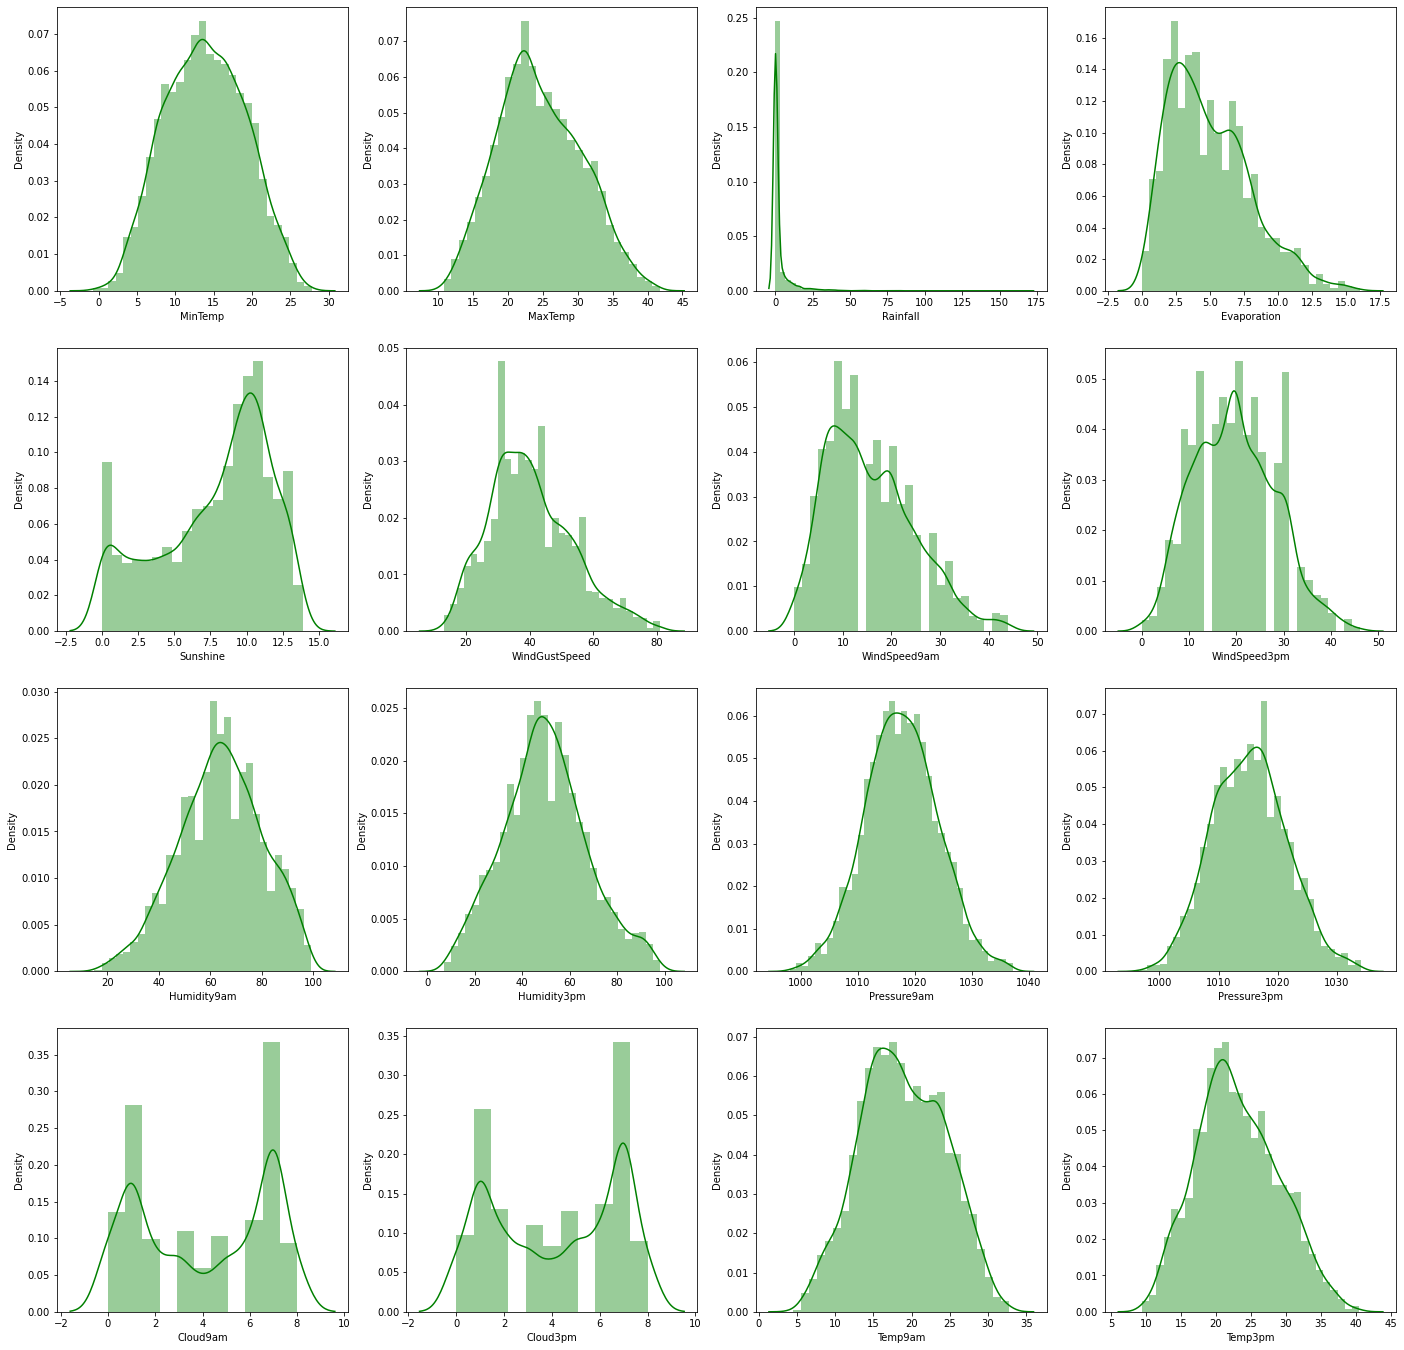

In [96]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols_cla:
    plt.subplot(4,4,plotnumber)
    sns.distplot(data_cla[col], color='green')
    plotnumber+=1

In [97]:
y_cla = data_cla['RainTomorrow']
X_cla = data_cla.drop(columns=['RainTomorrow'])

In [98]:
X_cla = pd.get_dummies(X_cla)

In [99]:
X_cla.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
RainToday_No      0
RainToday_Yes     0
Length: 72, dtype: int64

<h3>PreProcessing</h3>

In [100]:
from sklearn.preprocessing import power_transform
reg_cols = X_reg.columns
X_reg = power_transform(X_reg, method='yeo-johnson')
X_reg = pd.DataFrame(X_reg, columns=reg_cols)

In [101]:
cla_cols = X_cla.columns
X_cla = power_transform(X_cla, method='yeo-johnson')
X_cla = pd.DataFrame(X_cla, columns=cla_cols)

In [102]:
from sklearn.preprocessing import StandardScaler

sc_reg = StandardScaler()

X_reg = sc_reg.fit_transform(X_reg)
X_reg = pd.DataFrame(X_reg, columns=reg_cols)
sc_cla = StandardScaler()

X_cla = sc_cla.fit_transform(X_cla)
X_cla = pd.DataFrame(X_cla, columns=cla_cols)

<h2>MultiCollinearity</h2>

<h3>Regression Problem</h3>

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols_reg].values, i) for i in range(X_reg[num_cols_reg].shape[1])]
vif["Features"] = X_reg[num_cols_reg].columns
vif.nlargest(6, 'vif')

vif     Features
14  44.798801      Temp3pm
1   35.892627      MaxTemp
9   19.277241  Pressure9am
10  19.107531  Pressure3pm
13  16.334025      Temp9am
0    7.354542      MinTemp

In [104]:
num_cols_reg.remove('Temp3pm')
X_reg = X_reg.drop(columns=['Temp3pm'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols_reg].values, i) for i in range(X_reg[num_cols_reg].shape[1])]
vif["Features"] = X_reg[num_cols_reg].columns
vif.nlargest(6, 'vif')

vif     Features
10  18.177208  Pressure3pm
9   18.156384  Pressure9am
13  14.893021      Temp9am
1   12.474958      MaxTemp
0    7.214793      MinTemp
3    3.926108     Sunshine

In [105]:
num_cols_reg.remove('Pressure3pm')
X_reg = X_reg.drop(columns=['Pressure3pm'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols_reg].values, i) for i in range(X_reg[num_cols_reg].shape[1])]
vif["Features"] = X_reg[num_cols_reg].columns
vif.nlargest(6, 'vif')

vif     Features
12  14.668694      Temp9am
1   10.822269      MaxTemp
0    7.160774      MinTemp
3    3.877387     Sunshine
8    3.599114  Humidity3pm
7    3.317975  Humidity9am

In [106]:
num_cols_reg.remove('Temp9am')
X_reg = X_reg.drop(columns=['Temp9am'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols_reg].values, i) for i in range(X_reg[num_cols_reg].shape[1])]
vif["Features"] = X_reg[num_cols_reg].columns
vif.nlargest(6, 'vif')

vif       Features
1  5.941263        MaxTemp
0  4.882897        MinTemp
3  3.877149       Sunshine
4  3.223391  WindGustSpeed
8  2.769132    Humidity3pm
2  2.529407    Evaporation

In [107]:
num_cols_reg.remove('MaxTemp')
X_reg = X_reg.drop(columns=['MaxTemp'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols_reg].values, i) for i in range(X_reg[num_cols_reg].shape[1])]
vif["Features"] = X_reg[num_cols_reg].columns
vif.nlargest(6, 'vif')

vif       Features
2   3.598299       Sunshine
3   3.220059  WindGustSpeed
1   2.473097    Evaporation
6   2.437360    Humidity9am
10  2.390513       Cloud3pm
7   2.374246    Humidity3pm

<strong>VIF is below 5 for all columns now</strong>

<h3>Classification Problem</h3>

In [109]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_cla[num_cols_cla].values, i) for i in range(X_cla[num_cols_cla].shape[1])]
vif["Features"] = X_cla[num_cols_cla].columns
vif.nlargest(6, 'vif')

vif     Features
15  44.828925      Temp3pm
1   36.052497      MaxTemp
10  19.948943  Pressure9am
11  19.522329  Pressure3pm
14  16.428954      Temp9am
0    7.393642      MinTemp

In [110]:
num_cols_cla.remove('Temp3pm')
X_cla = X_cla.drop(columns=['Temp3pm'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_cla[num_cols_cla].values, i) for i in range(X_cla[num_cols_cla].shape[1])]
vif["Features"] = X_cla[num_cols_cla].columns
vif.nlargest(6, 'vif')

vif     Features
10  18.873358  Pressure9am
11  18.624548  Pressure3pm
14  14.969686      Temp9am
1   12.750738      MaxTemp
0    7.250129      MinTemp
4    3.931144     Sunshine

In [111]:
num_cols_cla.remove('Pressure9am')
X_cla = X_cla.drop(columns=['Pressure9am'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_cla[num_cols_cla].values, i) for i in range(X_cla[num_cols_cla].shape[1])]
vif["Features"] = X_cla[num_cols_cla].columns
vif.nlargest(6, 'vif')

vif     Features
13  14.650313      Temp9am
1   11.387312      MaxTemp
0    7.195802      MinTemp
4    3.898053     Sunshine
8    3.638977  Humidity9am
9    3.616553  Humidity3pm

In [112]:
num_cols_cla.remove('Temp9am')
X_cla = X_cla.drop(columns=['Temp9am'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_cla[num_cols_cla].values, i) for i in range(X_cla[num_cols_cla].shape[1])]
vif["Features"] = X_cla[num_cols_cla].columns
vif.nlargest(6, 'vif')

vif       Features
1  6.390515        MaxTemp
0  4.939000        MinTemp
4  3.897610       Sunshine
5  3.247333  WindGustSpeed
9  2.761446    Humidity3pm
8  2.649746    Humidity9am

In [113]:
num_cols_cla.remove('MaxTemp')
X_cla = X_cla.drop(columns=['MaxTemp'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_cla[num_cols_cla].values, i) for i in range(X_cla[num_cols_cla].shape[1])]
vif["Features"] = X_cla[num_cols_cla].columns
vif.nlargest(6, 'vif')

vif       Features
3   3.598378       Sunshine
4   3.244603  WindGustSpeed
7   2.639651    Humidity9am
2   2.498040    Evaporation
11  2.390875       Cloud3pm
8   2.368380    Humidity3pm

<strong>VIF below 5 for all variables<strong>

<h2>Building and Traing Models</h2>

<h3>Regression Problem</h3>

In [134]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=4)

print(X_train.shape)
print(X_test.shape)

(2651, 69)
(1137, 69)


<h3>Linear Regression</h3>

Cross Val Scores [0.29446518 0.23556003 0.34463929 0.35200902 0.35719263]
Corss Validation Score Mean===> 0.31677322917692063
________________________________
Training R2 Score : 0.35080149607509736
Training MSE      : 40.160087785922286
Training MAE      : 2.7228984608271
Training RMSE     : 6.337198733346011
________________________________
Testing R2 Score : 0.37239640847729416
Testing MSE      : 28.907792646815338
Testing MAE      : 2.5661110000991187
Testing RMSE     : 5.376596753227393


Text(0.5, 1.0, 'Training Data')

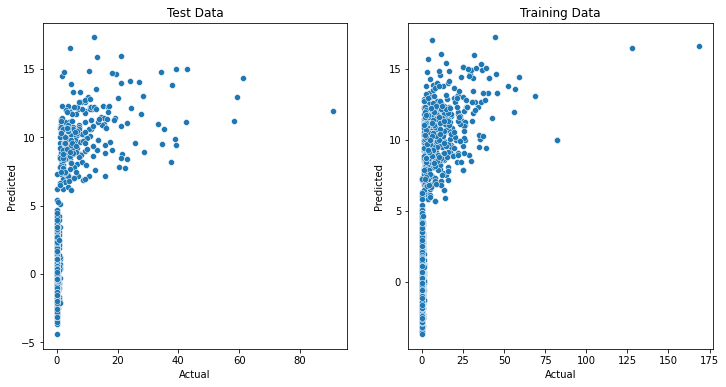

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
print('Cross Val Scores', cross_val_score(lr, X_train, y_train, cv=5, scoring='r2'))
print("Corss Validation Score Mean===>", cross_val_score(lr, X_train, y_train, cv=5).mean())
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

In [116]:
lrcv = LinearRegression()


grid_parmas = {
    'fit_intercept':[True, False],
    'positive':[True, False]
}
grid_lr = GridSearchCV(lrcv, param_grid = grid_parmas, cv=3, verbose=3)
grid_lr.fit(X_train, y_train)

print('Best Score -:', grid_lr.best_score_)
print('Best Params -:', grid_lr.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .fit_intercept=True, positive=True;, score=0.317 total time=   0.0s
[CV 2/3] END .fit_intercept=True, positive=True;, score=0.269 total time=   0.0s
[CV 3/3] END .fit_intercept=True, positive=True;, score=0.364 total time=   0.0s
[CV 1/3] END fit_intercept=True, positive=False;, score=0.312 total time=   0.0s
[CV 2/3] END fit_intercept=True, positive=False;, score=0.261 total time=   0.0s
[CV 3/3] END fit_intercept=True, positive=False;, score=0.363 total time=   0.0s
[CV 1/3] END fit_intercept=False, positive=True;, score=0.211 total time=   0.0s
[CV 2/3] END fit_intercept=False, positive=True;, score=0.191 total time=   0.0s
[CV 3/3] END fit_intercept=False, positive=True;, score=0.233 total time=   0.0s
[CV 1/3] END fit_intercept=False, positive=False;, score=0.206 total time=   0.0s
[CV 2/3] END fit_intercept=False, positive=False;, score=0.181 total time=   0.0s
[CV 3/3] END fit_intercept=False, positive=Fals

Corss Validation Score Mean===> 0.319212229017388
________________________________
Training R2 Score : 0.34844300506955916
Training MSE      : 40.30598646753059
Training MAE      : 2.7051196197295093
Training RMSE     : 6.348699588697719
________________________________
Testing R2 Score : 0.37593329139607246
Testing MSE      : 28.744881727545362
Testing MAE      : 2.535169807907802
Testing RMSE     : 5.361425344770303


Text(0.5, 1.0, 'Training Data')

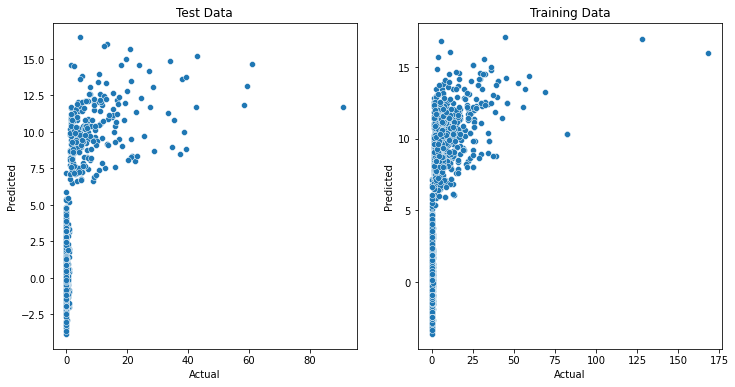

In [118]:
lrcv =  LinearRegression(positive=True, fit_intercept=True)

print("Corss Validation Score Mean===>", cross_val_score(lrcv, X_train, y_train, cv=5).mean())
lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lrcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h3>KNeighbors Regressor</h3>

Corss Validation Score Mean===> 0.2018923755071465
________________________________
Training R2 Score : 0.498634733021627
Training MSE      : 31.014971557902676
Training MAE      : 1.8785816672953601
Training RMSE     : 5.569108686127671
________________________________
Testing R2 Score : 0.27141130958617854
Testing MSE      : 33.55922603342128
Testing MAE      : 2.031627088830255
Testing RMSE     : 5.793032542064759


Text(0.5, 1.0, 'Training Data')

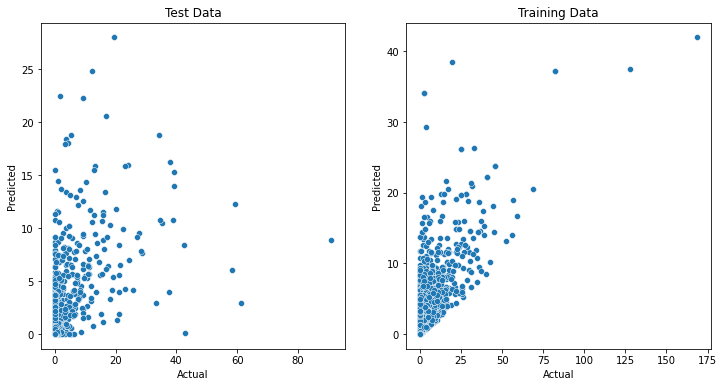

In [119]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
print("Corss Validation Score Mean===>", cross_val_score(knn, X_train, y_train, cv=5).mean())
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knn.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

In [123]:
knncv = KNeighborsRegressor()

grid_param = {
    'n_neighbors':[13,15,17,19,21,23,25,27,29],
    'weights' : ['uniform', 'distance'],
    'p':[1,2]
}

grid_knn = GridSearchCV(knncv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=3)
grid_knn.fit(X_train, y_train)

print('Best Score -:', grid_knn.best_score_)
print('Best Params -:', grid_knn.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Score -: 0.42206497515606384
Best Params -: {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}


Corss Validation Score Mean===> 0.43509393345070746
________________________________
Training R2 Score : 1.0
Training MSE      : 0.0
Training MAE      : 0.0
Training RMSE     : 0.0
________________________________
Testing R2 Score : 0.4678520869043382
Testing MSE      : 24.51104763738172
Testing MAE      : 1.4064378901386962
Testing RMSE     : 4.9508633224299095


Text(0.5, 1.0, 'Training Data')

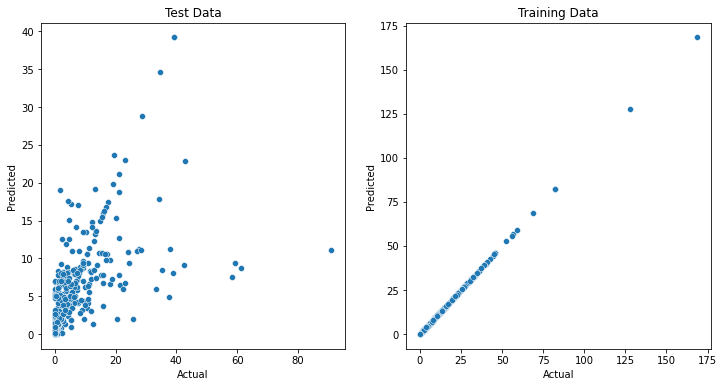

In [124]:
knncv = KNeighborsRegressor(n_neighbors=25, p=1,weights='distance')

print("Corss Validation Score Mean===>", cross_val_score(knncv, X_train, y_train, cv=5).mean())
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knncv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>This model has less difference in cross val score and Testing Score, so it is better than KNN</strong>

<h3>DecisionTreeRegressor</h3>

Corss Validation Score Mean===> 0.01947512750385767
________________________________
Training R2 Score : 1.0
Training MSE      : 2.4322947769930087e-34
Training MAE      : 7.852388423885962e-19
Training RMSE     : 1.5595816031849723e-17
________________________________
Testing R2 Score : -0.2211118985697187
Testing MSE      : 56.245136323658755
Testing MAE      : 1.969744942832014
Testing RMSE     : 7.499675747901289


Text(0.5, 1.0, 'Training Data')

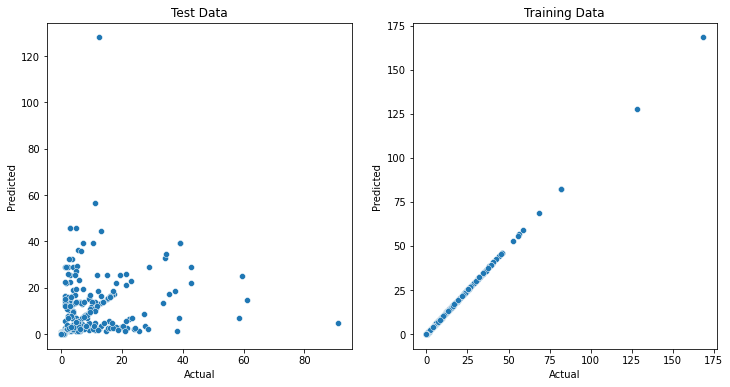

In [125]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
print("Corss Validation Score Mean===>", cross_val_score(dt, X_train, y_train, cv=5).mean())
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = dt.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

In [126]:
dtcv = DecisionTreeRegressor()

param_grid = {
    'max_depth':[None, 3,4,5,6,7,8,9],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8],
    'max_leaf_nodes':[10,15,20,25,30,35,40,35,50,55,60,75,80, None]
}

grid_dt = GridSearchCV(dtcv, param_grid = param_grid, cv=3)

grid_dt.fit(X_train, y_train)
print('Best Score -->', grid_dt.best_score_)
print('Best Params -->', grid_dt.best_params_)

Best Score --> 0.30647622441159933
Best Params --> {'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_leaf': 6, 'min_samples_split': 8}


Corss Validation Score Mean===> 0.29131502364826783
________________________________
Training R2 Score : 0.3972962687528375
Training MSE      : 37.28387328290714
Training MAE      : 1.878546018600971
Training RMSE     : 6.106052184751383
________________________________
Testing R2 Score : 0.33323435017466474
Testing MSE      : 30.71162021620226
Testing MAE      : 1.7820747527492082
Testing RMSE     : 5.5418065841566735


Text(0.5, 1.0, 'Training Data')

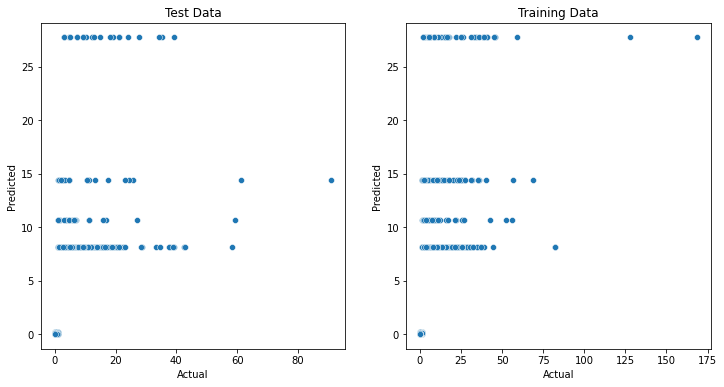

In [127]:
dtcv = DecisionTreeRegressor(max_leaf_nodes=10, min_samples_leaf=8, min_samples_split=6, max_depth=3)

print("Corss Validation Score Mean===>", cross_val_score(dtcv, X_train, y_train, cv=5).mean())
dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = dtcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>KNN was performing better than this model</strong>

<h3>AdaBoost Regressor</h3>

Corss Validation Score Mean===> -0.12086799250955235
________________________________
Training R2 Score : -0.7062963886260791
Training MSE      : 105.55325118856449
Training MAE      : 9.056484349553154
Training RMSE     : 10.273911192363135
________________________________
Testing R2 Score : -1.3624836149559005
Testing MSE      : 108.81739269041948
Testing MAE      : 8.969121964015665
Testing RMSE     : 10.431557539045619


Text(0.5, 1.0, 'Training Data')

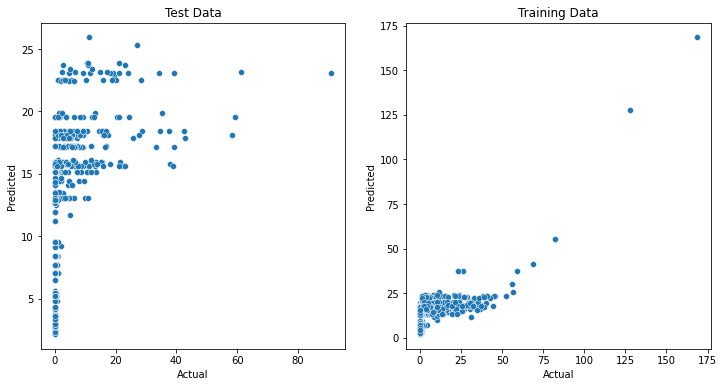

In [128]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()

print("Corss Validation Score Mean===>", cross_val_score(ad, X_train, y_train, cv=5).mean())
ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = ad.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

In [129]:
adcv = AdaBoostRegressor()

grid_params = {
    'n_estimators':[10,20,30,50,100, 150],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.8],
    'loss' : ['linear', 'square', 'exponential']
}

grid_ad = GridSearchCV(adcv, param_grid = grid_params, cv=3, n_jobs=-1, verbose=3)
grid_ad.fit(X_train,y_train)
print('Best Score -->', grid_ad.best_score_)
print('Best Params -->', grid_ad.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Score --> 0.38431414013455606
Best Params --> {'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 30}


Corss Validation Score Mean===> 0.34705831416271954
________________________________
Training R2 Score : 0.5852633451516995
Training MSE      : 25.65603642961291
Training MAE      : 2.0685722758169307
Training RMSE     : 5.065178815166639
________________________________
Testing R2 Score : 0.35225389478871016
Testing MSE      : 29.835568741407943
Testing MAE      : 1.9566611295471177
Testing RMSE     : 5.462194498679807


Text(0.5, 1.0, 'Training Data')

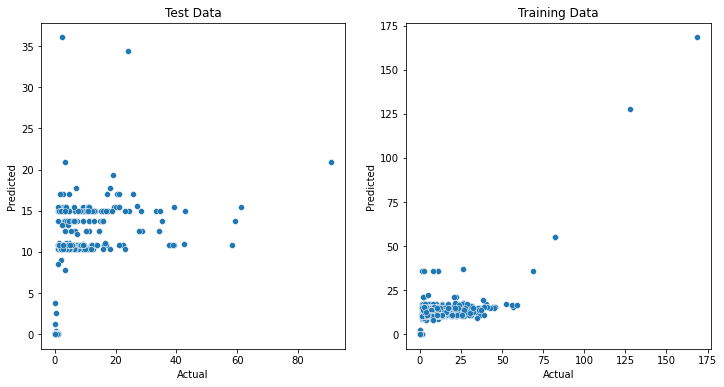

In [130]:
adcv = AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=30)
print("Corss Validation Score Mean===>", cross_val_score(adcv, X_train, y_train, cv=5).mean())
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = adcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>This model has low differnce bwtween cross val score and test score<strong>

<h3>XGBRegressor</h3>

Corss Validation Score Mean===> 0.23186045539342448
________________________________
Training R2 Score : 0.9985023649282574
Training MSE      : 0.09264524731470777
Training MAE      : 0.17189599073257755
Training RMSE     : 0.3043768179653434
________________________________
Testing R2 Score : 0.4553847094389961
Testing MSE      : 25.085302417765092
Testing MAE      : 1.5295647650449569
Testing RMSE     : 5.008522977661687


Text(0.5, 1.0, 'Training Data')

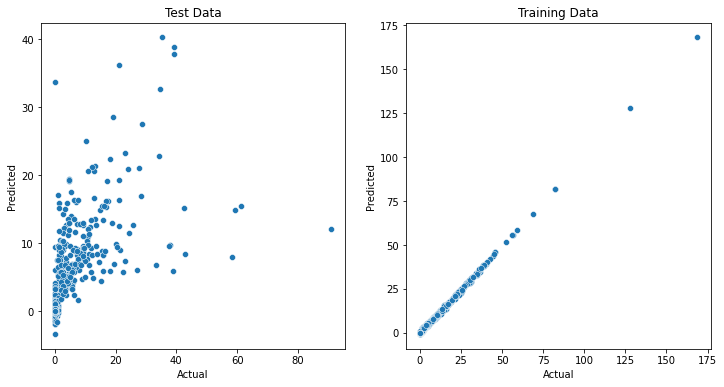

In [131]:
from xgboost import XGBRegressor

xg = XGBRegressor()

print("Corss Validation Score Mean===>", cross_val_score(xg, X_train, y_train, cv=5).mean())
xg.fit(X_train, y_train)

y_pred_train = xg.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xg.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

In [136]:
xgcv = XGBRegressor()

grid_params = {
    'n_estimators':[10,20,50,100,150, 180,200],
    'max_depth':[4,5,6,7],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
    'n_jobs':[-1]
}

grid_xg = GridSearchCV(xgcv, param_grid=grid_params, cv=3, n_jobs=-1, verbose=3)
grid_xg.fit(X_train, y_train)

print('Best Score -->', grid_xg.best_score_)
print('Best Params -->', grid_xg.best_params_)

Fitting 3 folds for each of 196 candidates, totalling 588 fits
Best Score --> 0.3067690179887959
Best Params --> {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'n_jobs': -1}


Corss Validation Score Mean===> 0.315678967921059
________________________________
Training R2 Score : 0.7242158194401973
Training MSE      : 14.329803344867832
Training MAE      : 1.3754042047617296
Training RMSE     : 3.7854726712615205
________________________________
Testing R2 Score : 0.13162295005355407
Testing MSE      : 60.046031216684945
Testing MAE      : 2.0781428761044705
Testing RMSE     : 7.748937425007699


Text(0.5, 1.0, 'Training Data')

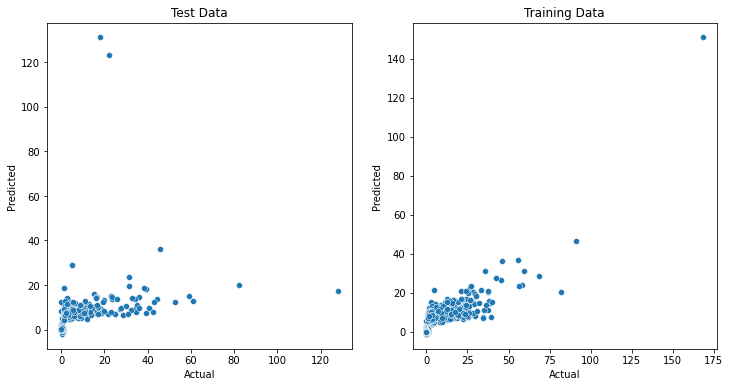

In [137]:
xgcv = XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=50)
print("Corss Validation Score Mean===>", cross_val_score(xgcv, X_train, y_train, cv=5).mean())
xgcv.fit(X_train, y_train)

y_pred_train = xgcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xgcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>AdaBoost Regressor was the best peforming model as it has the least difference between cross val score and testing score</strong>

<h3>Model Saving</h3>

In [138]:
import pickle
pickle.dump(adcv, open('reg.pickle', 'wb'))

<h2>OverSampling Classifictaion Prolem</h2>

In [139]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_cla, y_cla = oversample.fit_resample(X_cla, y_cla)

<h2>Building model for Regression Problem</h2>

In [140]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_cla, y_cla, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(4096, 68)
(1756, 68)


<h3>Logistic Regression</h3>

In [141]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.841064453125
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.83      0.85      0.84      1975
         Yes       0.85      0.84      0.85      2121

    accuracy                           0.84      4096
   macro avg       0.84      0.84      0.84      4096
weighted avg       0.84      0.84      0.84      4096


Testing Accuracy : 0.8439635535307517
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.83      0.86      0.85       872
         Yes       0.86      0.82      0.84       884

    accuracy                           0.84      1756
   macro avg       0.84      0.84      0.84      1756
weighted avg       0.84      0.84      0.84      1756



Text(33.0, 0.5, 'Predicted')

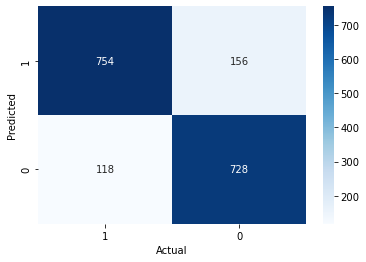

In [142]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

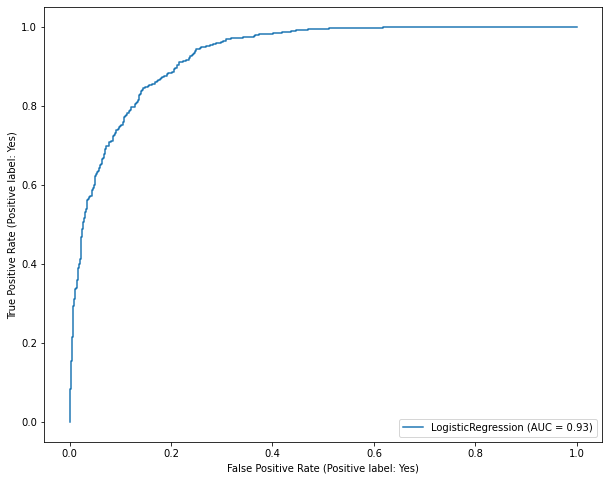

In [143]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)

In [144]:
lrcv  = LogisticRegression()
grid_param = {
    'penalty':['l2'],
    'dual':[True, False],
    'max_iter':np.arange(2,20,4),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lrcv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=True)
grid_lr.fit(X_train, y_train)
print('Best Score:', grid_lr.best_score_)
print('Best Params:', grid_lr.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score: 0.8398427178807851
Best Params: {'dual': False, 'fit_intercept': True, 'max_iter': 10, 'penalty': 'l2', 'solver': 'sag'}


In [145]:
lrcv = LogisticRegression(max_iter=10, solver='sag')
lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
y_pred_test = lrcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.838623046875
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.83      0.84      0.83      1981
         Yes       0.85      0.84      0.84      2115

    accuracy                           0.84      4096
   macro avg       0.84      0.84      0.84      4096
weighted avg       0.84      0.84      0.84      4096


Testing Accuracy : 0.8485193621867881
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.84      0.86      0.85       886
         Yes       0.86      0.83      0.84       870

    accuracy                           0.85      1756
   macro avg       0.85      0.85      0.85      1756
weighted avg       0.85      0.85      0.85      1756



Text(33.0, 0.5, 'Predicted')

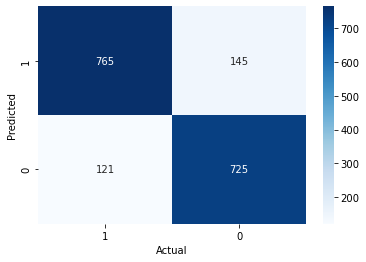

In [146]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

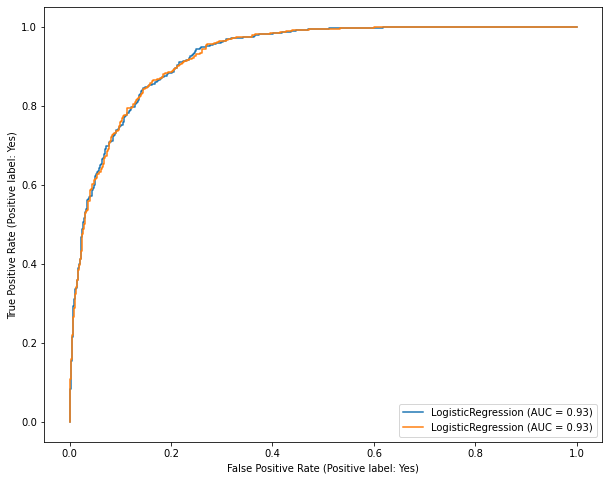

In [147]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)

<h3>KNeighbors Classifier</h3>

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.893310546875
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.81      0.97      0.88      1667
         Yes       0.98      0.84      0.90      2429

    accuracy                           0.89      4096
   macro avg       0.89      0.91      0.89      4096
weighted avg       0.91      0.89      0.89      4096


Testing Accuracy : 0.835990888382688
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.72      0.95      0.82       694
         Yes       0.96      0.76      0.85      1062

    accuracy                           0.84      1756
   macro avg       0.84      0.86      0.83      1756
weighted avg       0.86      0.84      0.84      1756



Text(33.0, 0.5, 'Predicted')

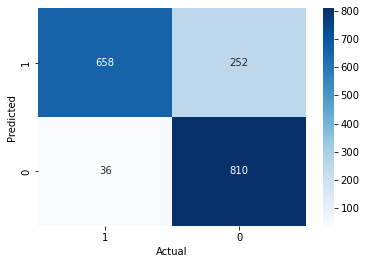

In [149]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

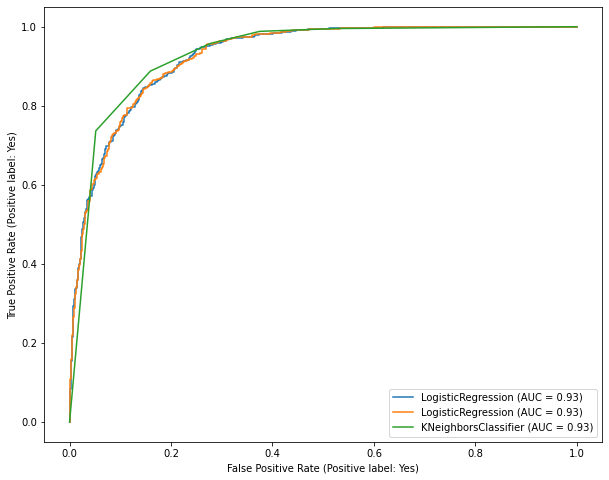

In [150]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)

In [151]:
knncv = KNeighborsClassifier()

grid_param = {
    'n_neighbors':[3,5,7,9,11,13],
    'leaf_size':[5,10,15,25,30,35,40,50]
}

grid_knn = GridSearchCV(knncv, param_grid=grid_param, n_jobs=-1, cv=3, verbose=3)
grid_knn.fit(X_train, y_train)
print('Best Score:', grid_knn.best_score_)
print('Best Params:', grid_knn.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Score: 0.8415505106573922
Best Params: {'leaf_size': 5, 'n_neighbors': 3}


In [152]:
knncv = KNeighborsClassifier(n_neighbors=3, leaf_size=5)
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
y_pred_test = knncv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.942626953125
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.89      0.99      0.94      1825
         Yes       0.99      0.91      0.95      2271

    accuracy                           0.94      4096
   macro avg       0.94      0.95      0.94      4096
weighted avg       0.95      0.94      0.94      4096


Testing Accuracy : 0.8627562642369021
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.77      0.96      0.85       727
         Yes       0.97      0.79      0.87      1029

    accuracy                           0.86      1756
   macro avg       0.87      0.88      0.86      1756
weighted avg       0.88      0.86      0.86      1756



Text(33.0, 0.5, 'Predicted')

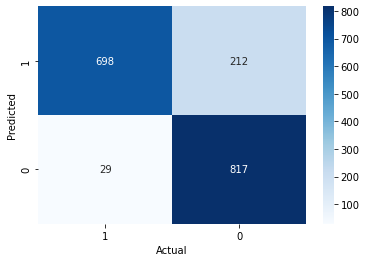

In [153]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')


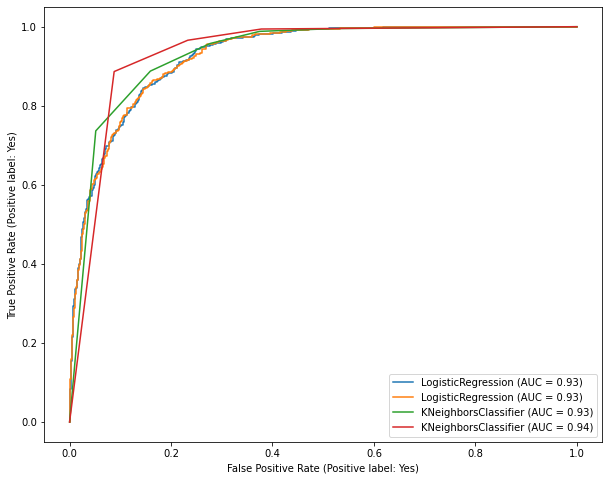

In [154]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)

<strong>KNN has better AUC than Logistc Regression</strong>

<h3>DecisionTree Classifier</h3>

In [155]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      2016
         Yes       1.00      1.00      1.00      2080

    accuracy                           1.00      4096
   macro avg       1.00      1.00      1.00      4096
weighted avg       1.00      1.00      1.00      4096


Testing Accuracy : 0.8809794988610479
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.87      0.89      0.88       891
         Yes       0.89      0.87      0.88       865

    accuracy                           0.88      1756
   macro avg       0.88      0.88      0.88      1756
weighted avg       0.88      0.88      0.88      1756



Text(33.0, 0.5, 'Predicted')

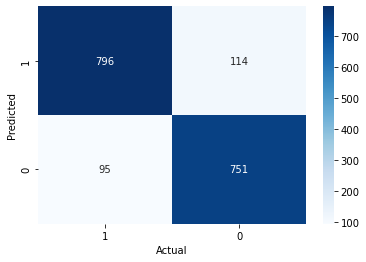

In [156]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

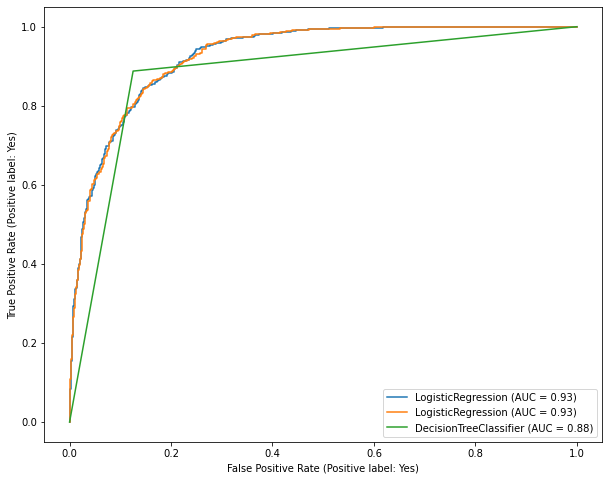

In [157]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)

In [161]:
dtcv = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[None,14,15,16,17,18,19,20,21,22],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[3,4,5,6,7],
    'max_leaf_nodes':[25,30,35,40,50,60,70,80,None]
}

grid_dt = GridSearchCV(dtcv, param_grid=grid_param, cv=3, n_jobs=-1)
grid_dt.fit(X_train, y_train)

print('Best Score:', grid_dt.best_score_)
print('Best Params:', grid_dt.best_params_)

Best Score: 0.8505803778131743
Best Params: {'criterion': 'entropy', 'max_depth': 18, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}


In [162]:
dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=18, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=3, splitter='random')

dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
y_pred_test = dtcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.947509765625
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.94      0.95      0.95      2005
         Yes       0.95      0.95      0.95      2091

    accuracy                           0.95      4096
   macro avg       0.95      0.95      0.95      4096
weighted avg       0.95      0.95      0.95      4096


Testing Accuracy : 0.8661731207289294
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.85      0.88      0.87       879
         Yes       0.88      0.85      0.86       877

    accuracy                           0.87      1756
   macro avg       0.87      0.87      0.87      1756
weighted avg       0.87      0.87      0.87      1756



Text(33.0, 0.5, 'Predicted')

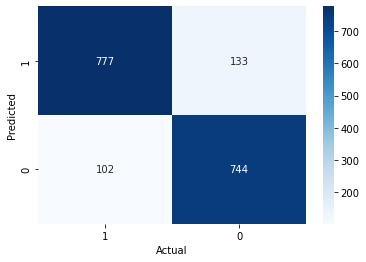

In [163]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

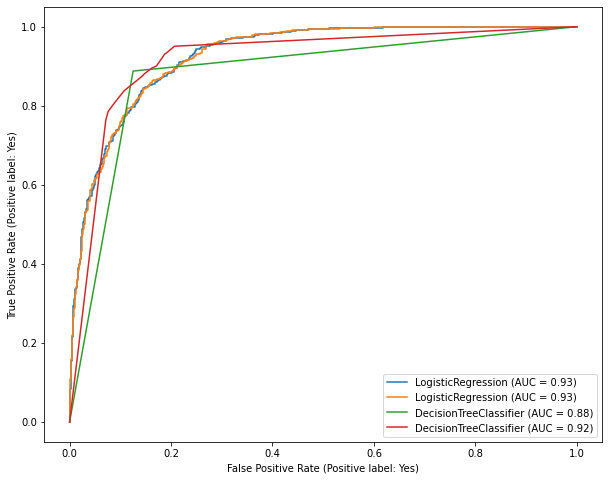

In [164]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)

<strong>KNN was performing better than this model</strong>

<h3>RandomForest Classifier</h3>

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      2016
         Yes       1.00      1.00      1.00      2080

    accuracy                           1.00      4096
   macro avg       1.00      1.00      1.00      4096
weighted avg       1.00      1.00      1.00      4096


Testing Accuracy : 0.9362186788154897
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.93      0.95      0.94       886
         Yes       0.95      0.92      0.93       870

    accuracy                           0.94      1756
   macro avg       0.94      0.94      0.94      1756
weighted avg       0.94      0.94      0.94      1756



Text(33.0, 0.5, 'Predicted')

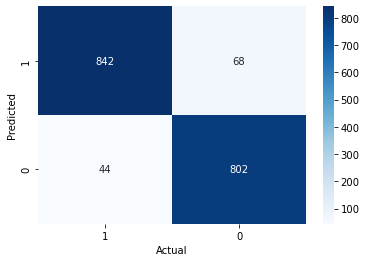

In [166]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

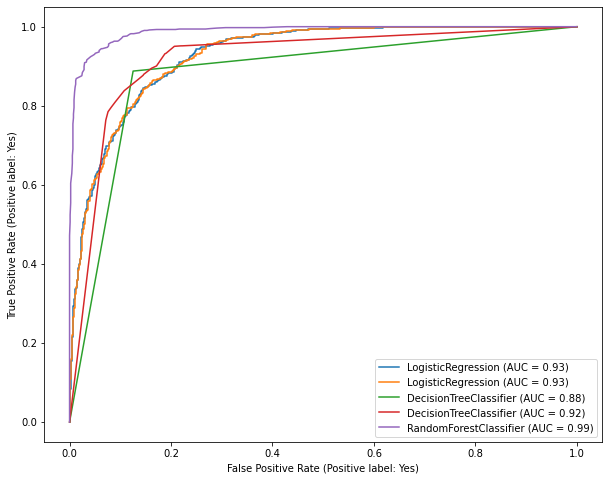

In [167]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)

<strong>RandomForest is performing much better than all other models</strong>

In [173]:
rfcv = RandomForestClassifier()

grid_param = {
    'n_estimators':[300,350,400,450],
    'max_depth':[None,16,17,18],
    'min_samples_split':[2,3,4,],
    'min_samples_leaf':[2,3,4,],
    'max_leaf_nodes':[None,35,40,45,50,55],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rfcv, param_grid = grid_param, cv=3, n_jobs=-1,verbose=3)
grid_rf.fit(X_train, y_train)

print('Best Score:', grid_rf.best_score_)
print('Best Params:', grid_rf.best_params_)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best Score: 0.9086893097141999
Best Params: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 450, 'n_jobs': -1}


In [174]:
rfcv = RandomForestClassifier( max_depth=None, min_samples_leaf=2, min_samples_split=4, n_estimators=450, max_leaf_nodes=None)

rfcv.fit(X_train, y_train)

y_pred_train = rfcv.predict(X_train)
y_pred_test = rfcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.990478515625
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.99      0.99      0.99      2021
         Yes       0.99      0.99      0.99      2075

    accuracy                           0.99      4096
   macro avg       0.99      0.99      0.99      4096
weighted avg       0.99      0.99      0.99      4096


Testing Accuracy : 0.9345102505694761
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.93      0.95      0.94       891
         Yes       0.94      0.92      0.93       865

    accuracy                           0.93      1756
   macro avg       0.93      0.93      0.93      1756
weighted avg       0.93      0.93      0.93      1756



Text(33.0, 0.5, 'Predicted')

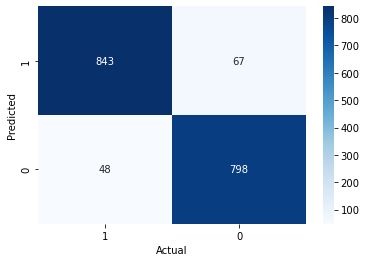

In [175]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

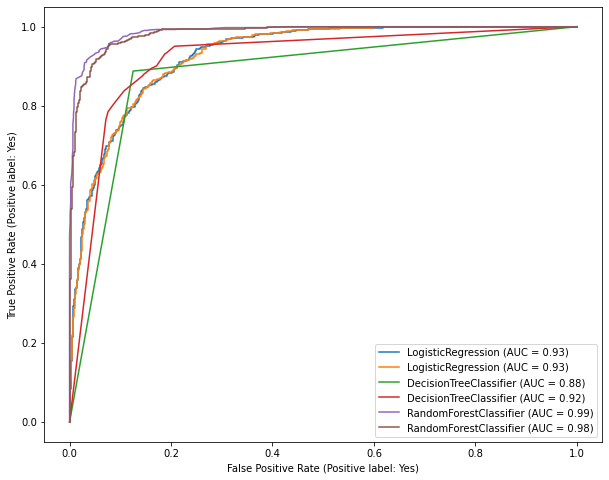

In [176]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)

<strong>random Forest without hyperparameter tuning is best performing</strong>

<h3>AdaBoostClassifier</h3>

In [177]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()

ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
y_pred_test = ad.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))


Training Accuracy :  0.868896484375
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.86      0.87      0.87      1991
         Yes       0.88      0.87      0.87      2105

    accuracy                           0.87      4096
   macro avg       0.87      0.87      0.87      4096
weighted avg       0.87      0.87      0.87      4096


Testing Accuracy : 0.8627562642369021
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.85      0.88      0.87       879
         Yes       0.88      0.84      0.86       877

    accuracy                           0.86      1756
   macro avg       0.86      0.86      0.86      1756
weighted avg       0.86      0.86      0.86      1756



Text(33.0, 0.5, 'Predicted')

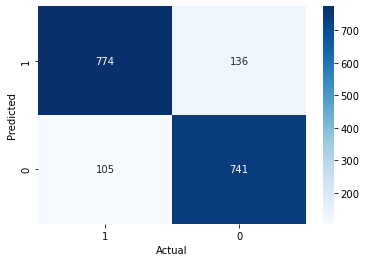

In [178]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

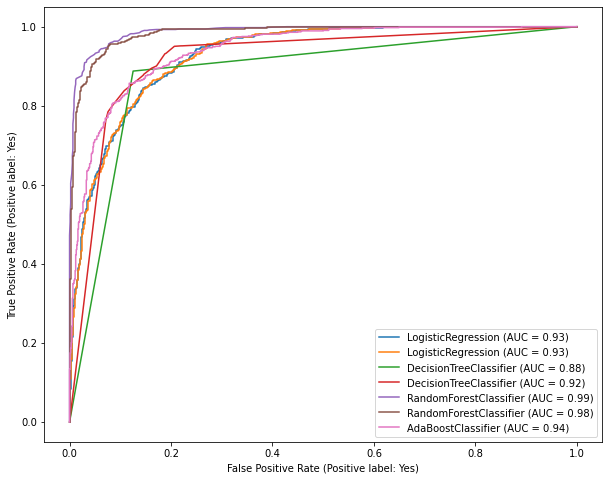

In [179]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)

In [182]:
adcv = AdaBoostClassifier()

grid_params ={
    'n_estimators':[30,50,70,90,110,130,150],
    'learning_rate':[0.01, 0.05, 0.1,0.3,0.5,0.7, 0.9,1,1.4,1.5]
}

grid_ad = GridSearchCV(adcv, param_grid=grid_params, cv=3, verbose=1)

grid_ad.fit(X_train, y_train)

print('Best Score:', grid_ad.best_score_)
print('Best Params:', grid_ad.best_params_)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
Best Score: 0.8757317515736256
Best Params: {'learning_rate': 1.4, 'n_estimators': 110}


In [183]:
adcv = AdaBoostClassifier(n_estimators=110, learning_rate=1.4)
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
y_pred_test = adcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.89990234375
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.90      0.90      0.90      2008
         Yes       0.90      0.90      0.90      2088

    accuracy                           0.90      4096
   macro avg       0.90      0.90      0.90      4096
weighted avg       0.90      0.90      0.90      4096


Testing Accuracy : 0.8832574031890661
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.87      0.90      0.89       883
         Yes       0.89      0.87      0.88       873

    accuracy                           0.88      1756
   macro avg       0.88      0.88      0.88      1756
weighted avg       0.88      0.88      0.88      1756



Text(33.0, 0.5, 'Predicted')

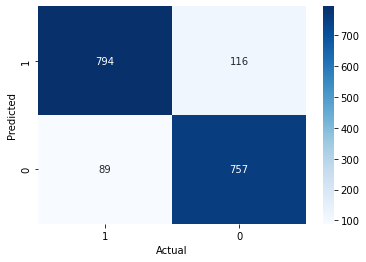

In [184]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

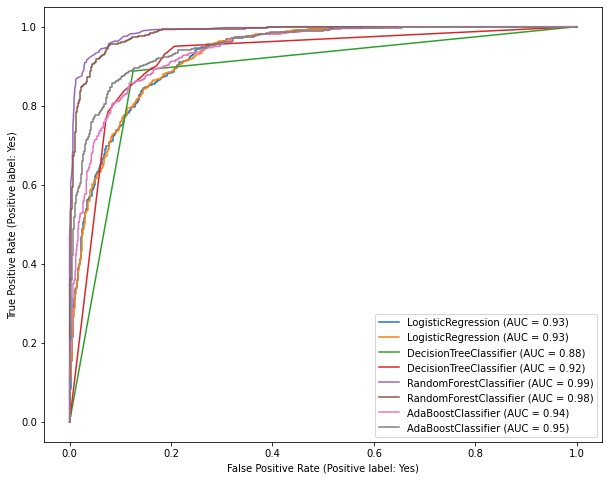

In [185]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)
plot_roc_curve(adcv, X_test, y_test, ax=ax)

<strong>RandomForest is the best performing model as it has highest AUC</strong>

<h2>Model Saving</h2>

In [186]:
pickle.dump(rf, open('classification.pickle', 'wb'))